In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import sys, os
sys.path.append(f'/home/{os.environ.get("USER")}/Microsoft-Malware-Prediction/py')
from datetime import datetime

import utils, EDA

In [2]:
tr = pd.read_feather('../data/train.f')
te = pd.read_feather('../data/test.f')


In [3]:
# AS timestamp
datedictAS = np.load('../external/AvSigVersionTimestamps.npy')[()]
tr['AvSigVersion_datetime'] = tr['AvSigVersion'].map(datedictAS)
te['AvSigVersion_datetime'] = te['AvSigVersion'].map(datedictAS)


In [4]:
tr['AvSigVersion_date'] = tr['AvSigVersion_datetime'].dt.date
te['AvSigVersion_date'] = te['AvSigVersion_datetime'].dt.date

In [5]:
trte = pd.concat([tr, te], ignore_index=True)

ProductName


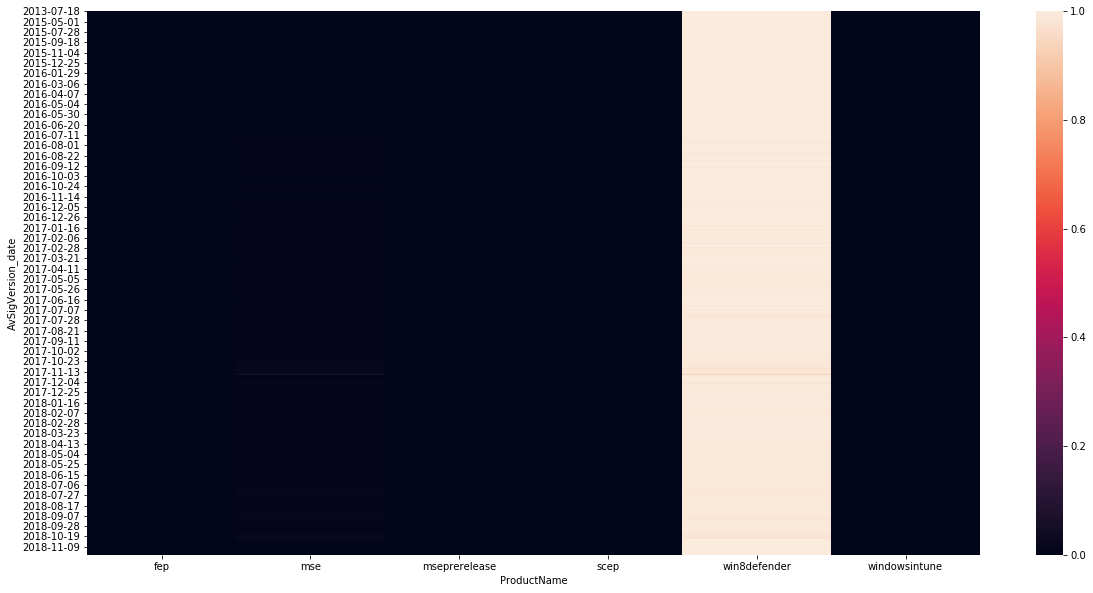

EngineVersion


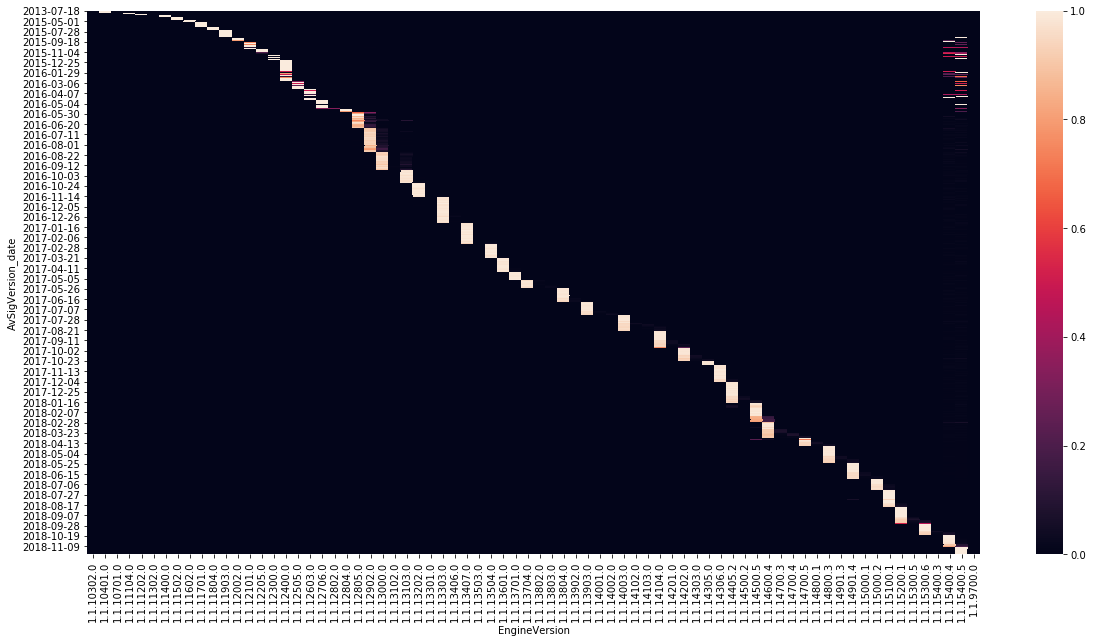

AppVersion


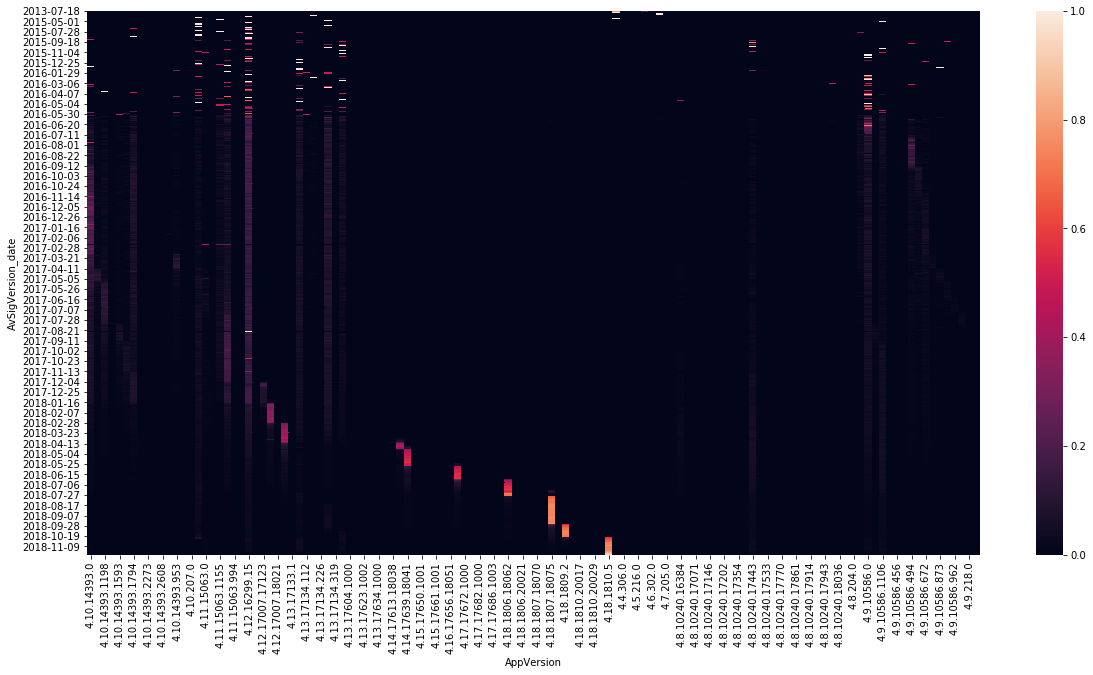

IsBeta


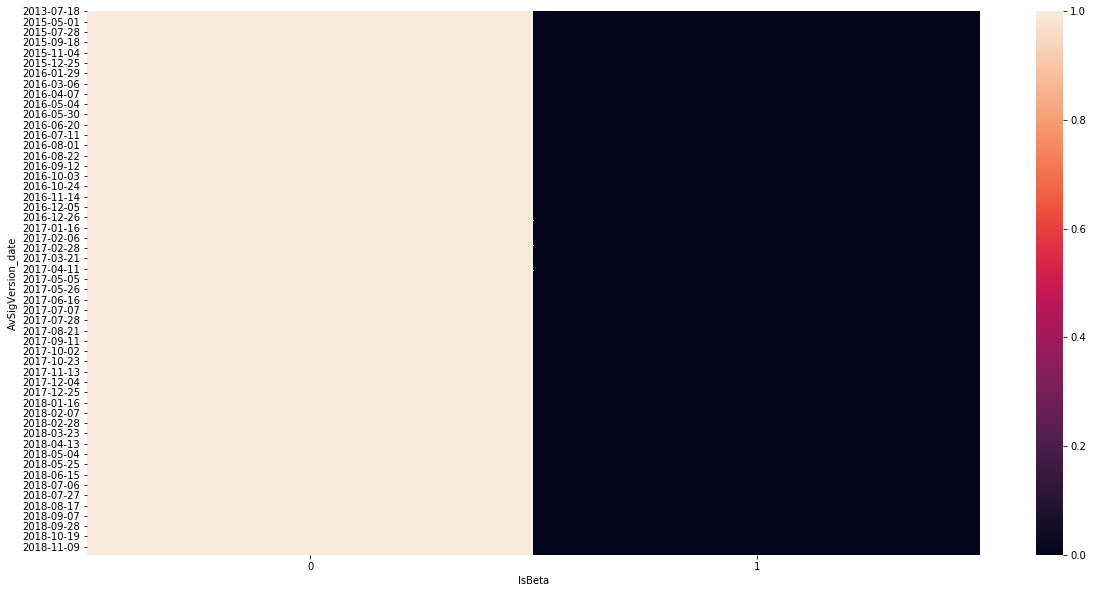

RtpStateBitfield


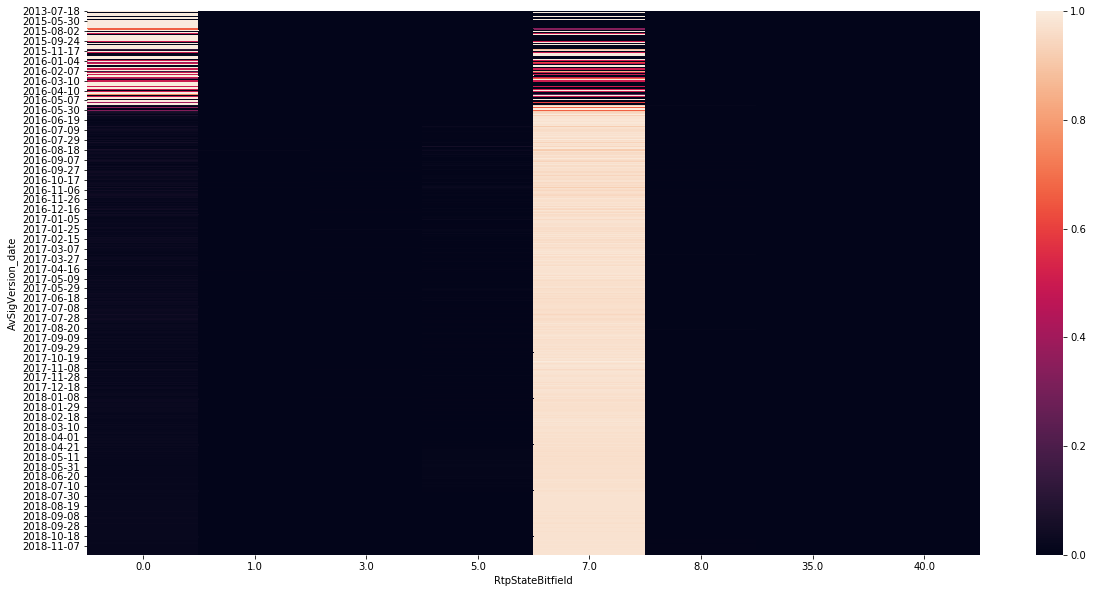

IsSxsPassiveMode


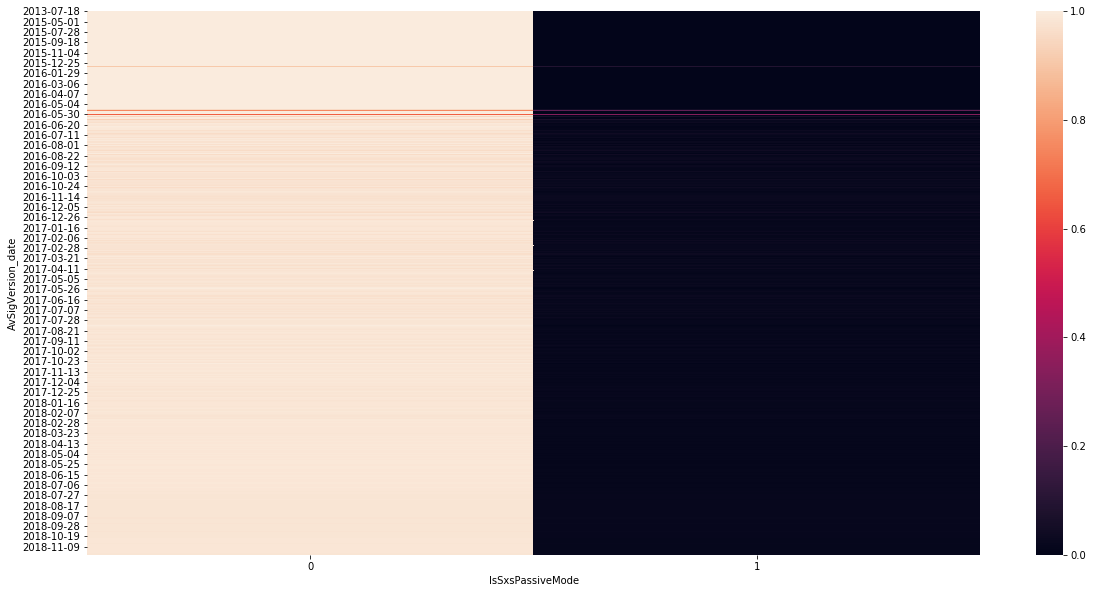

DefaultBrowsersIdentifier


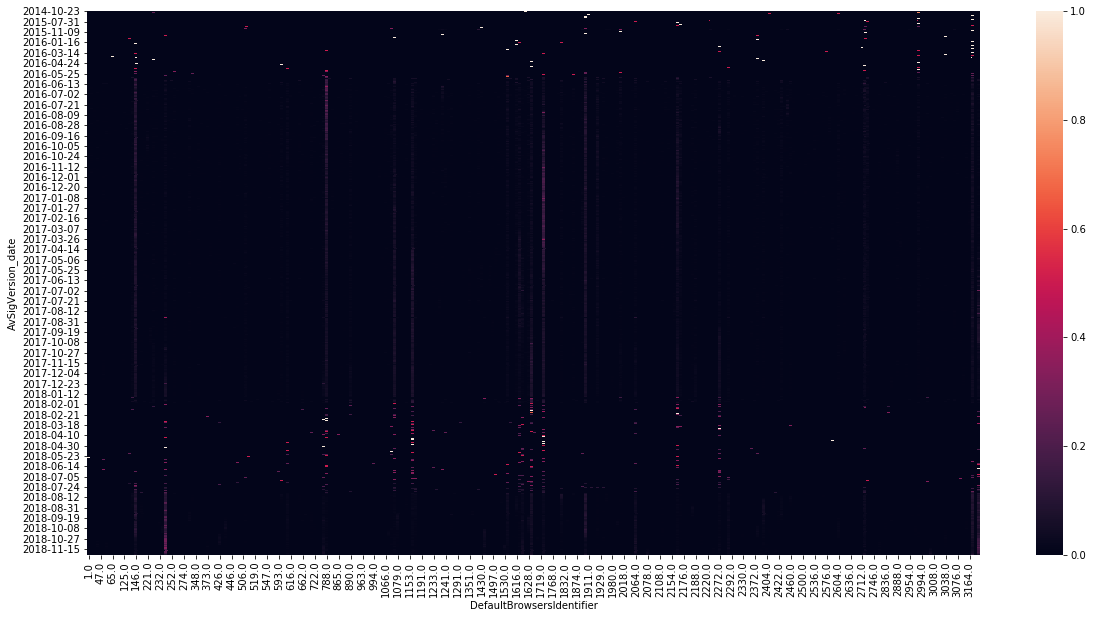

AVProductStatesIdentifier


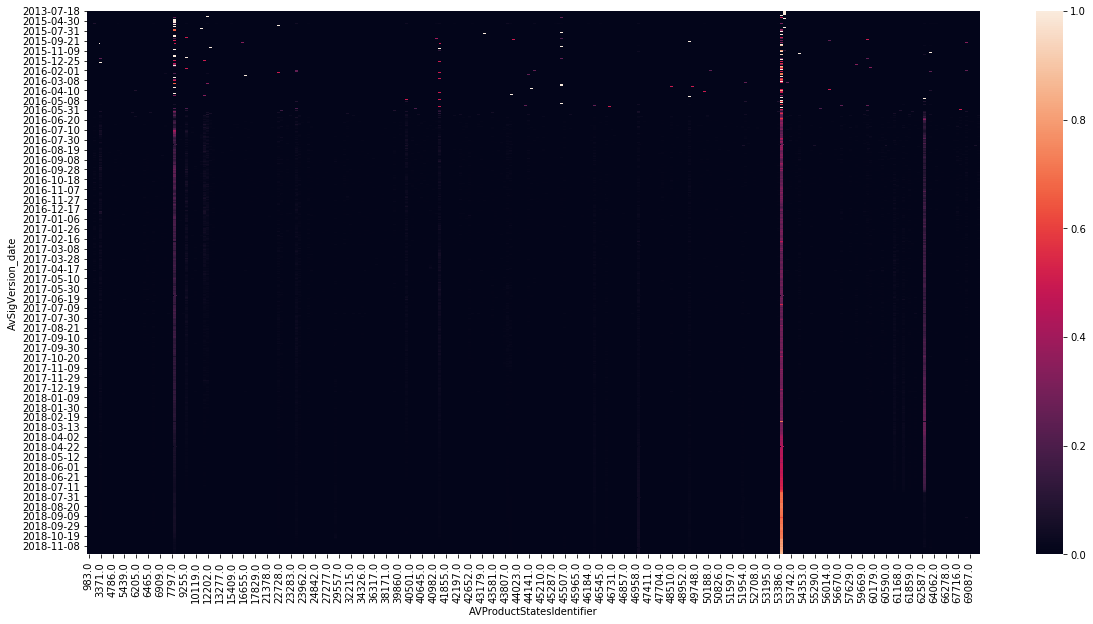

AVProductsInstalled


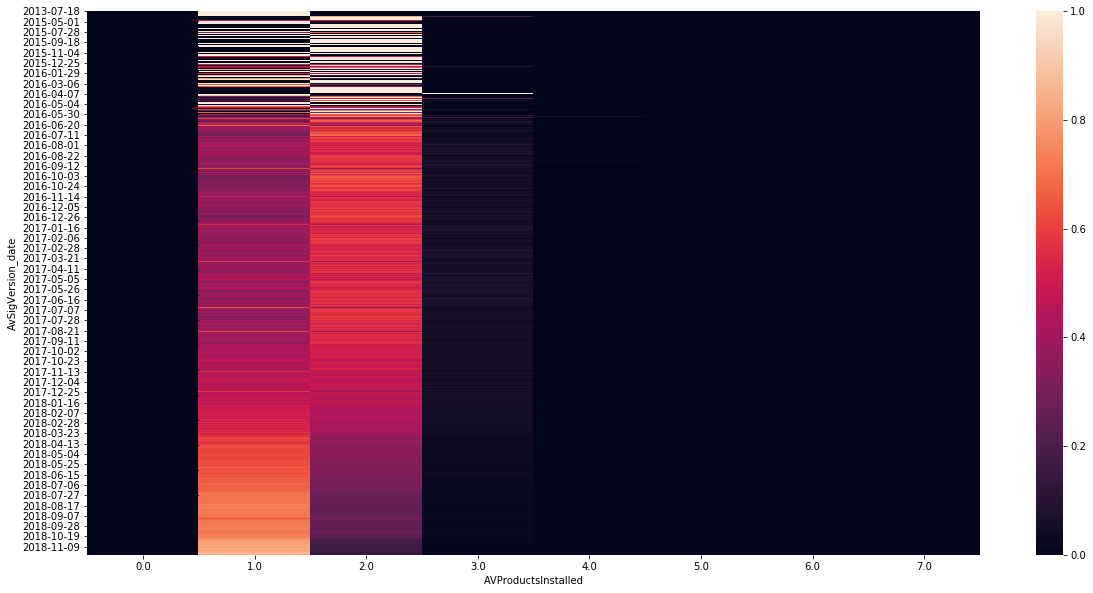

AVProductsEnabled


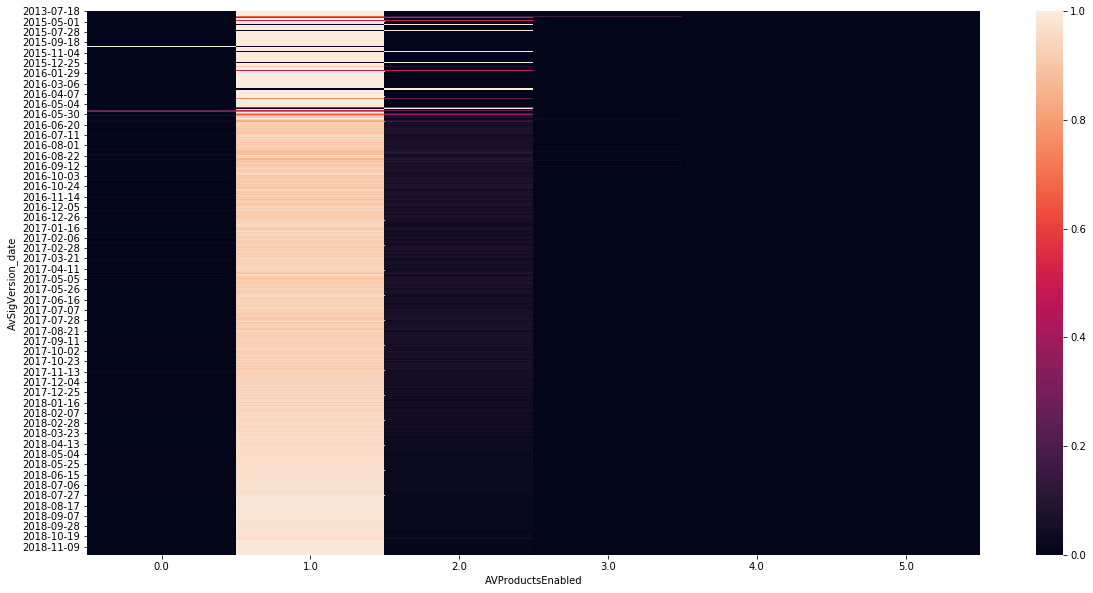

HasTpm


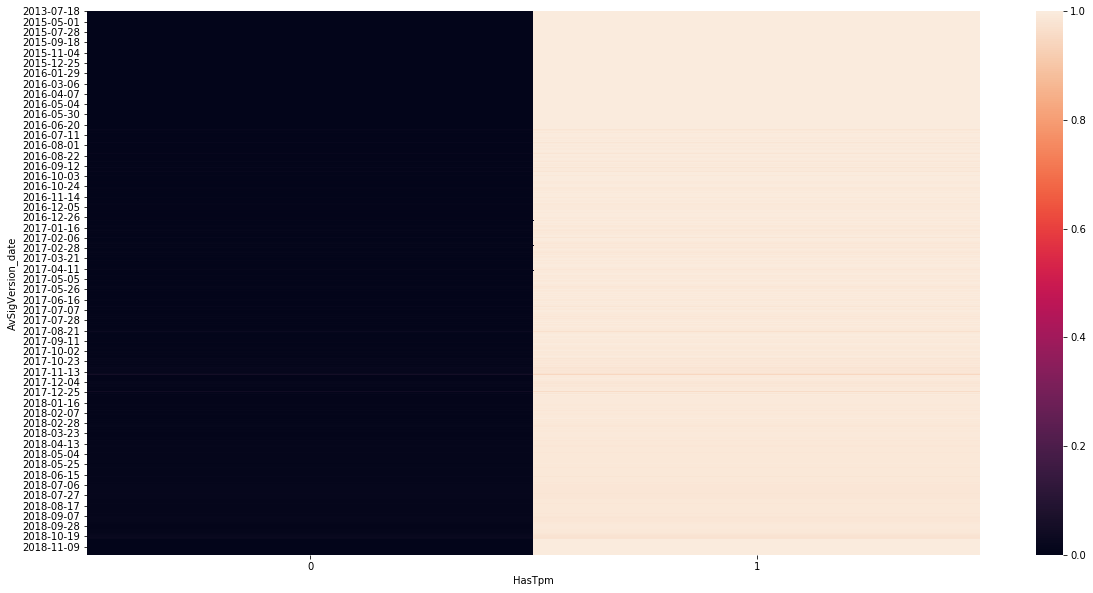

CountryIdentifier


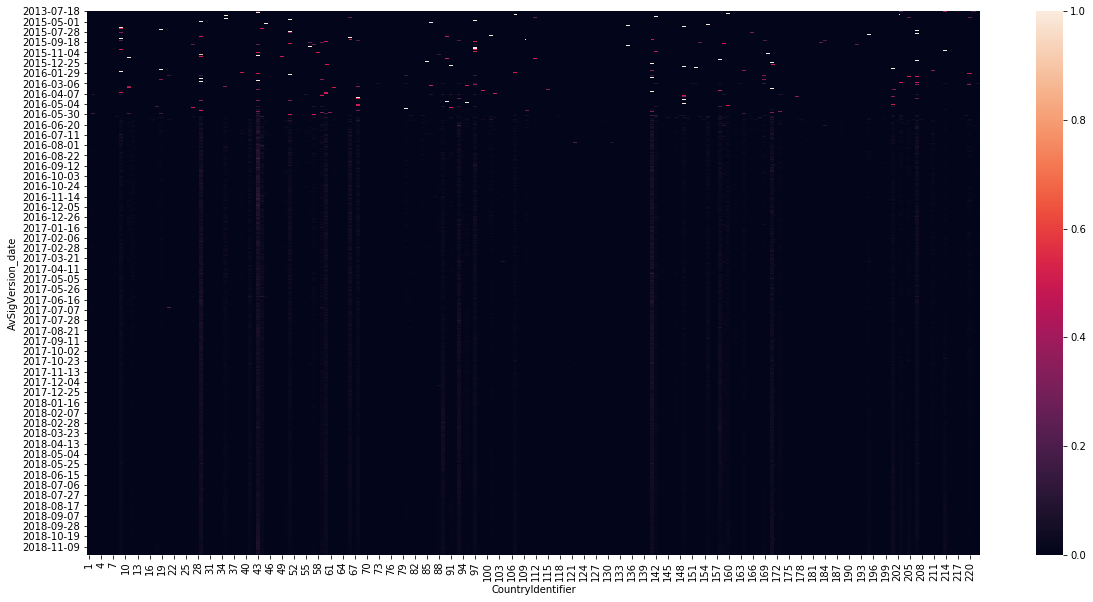

CityIdentifier


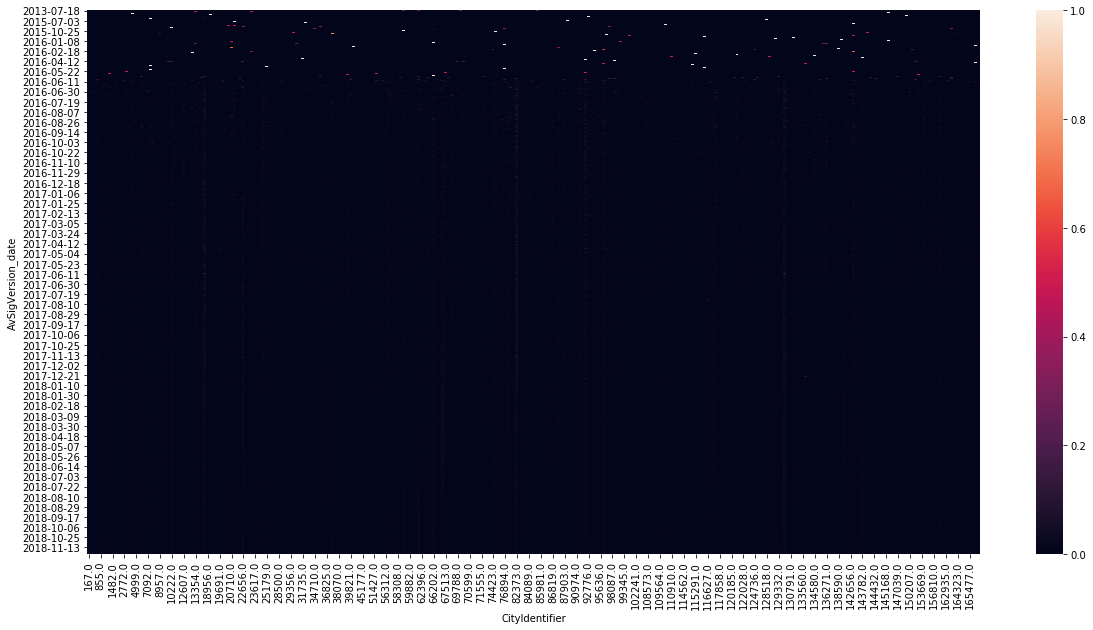

OrganizationIdentifier


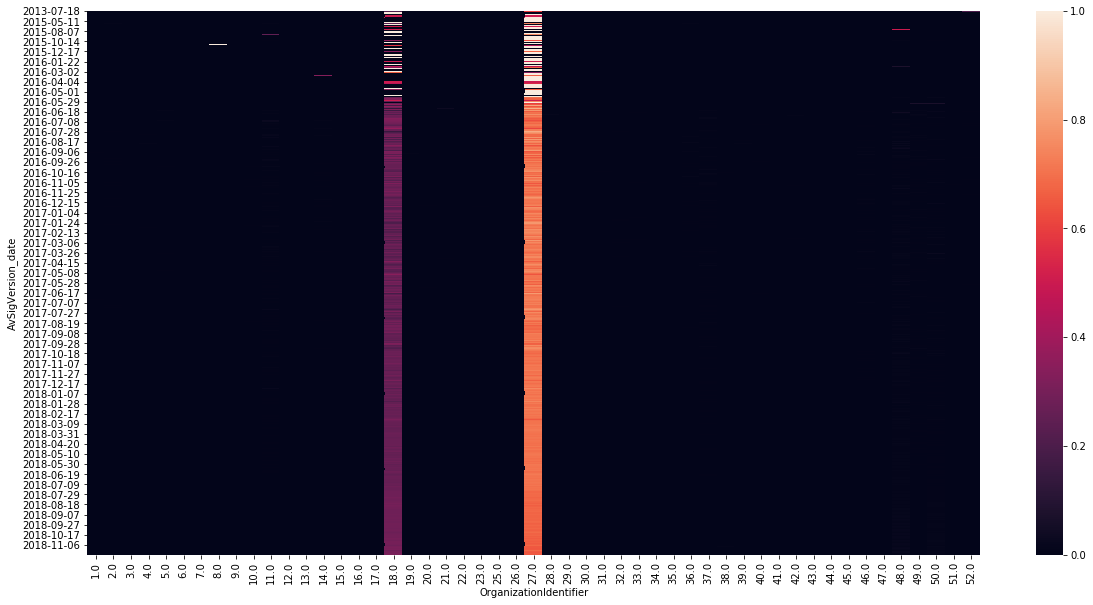

GeoNameIdentifier


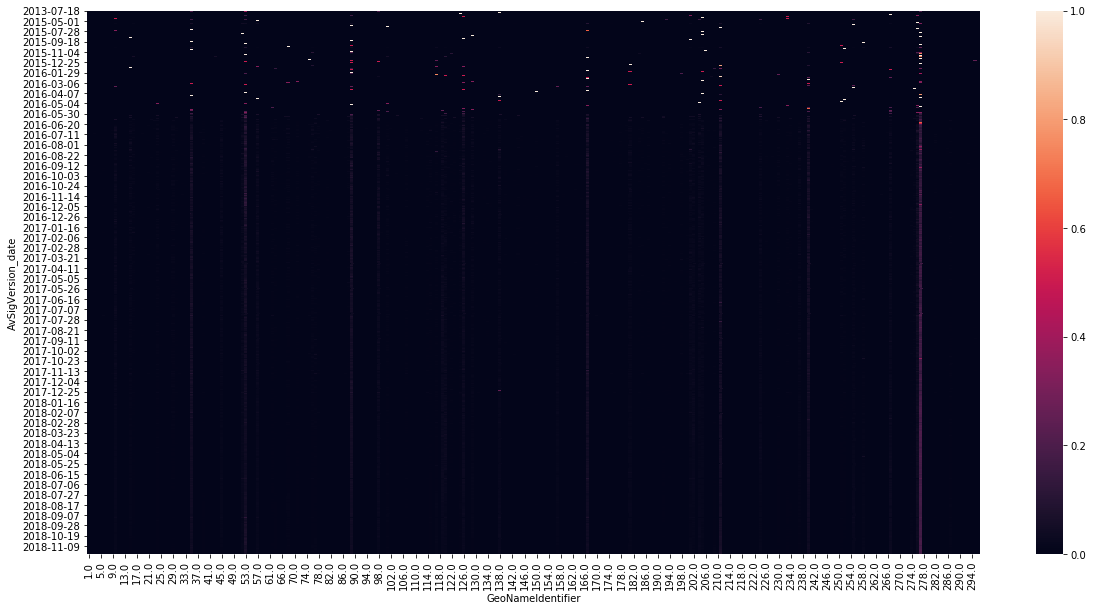

LocaleEnglishNameIdentifier


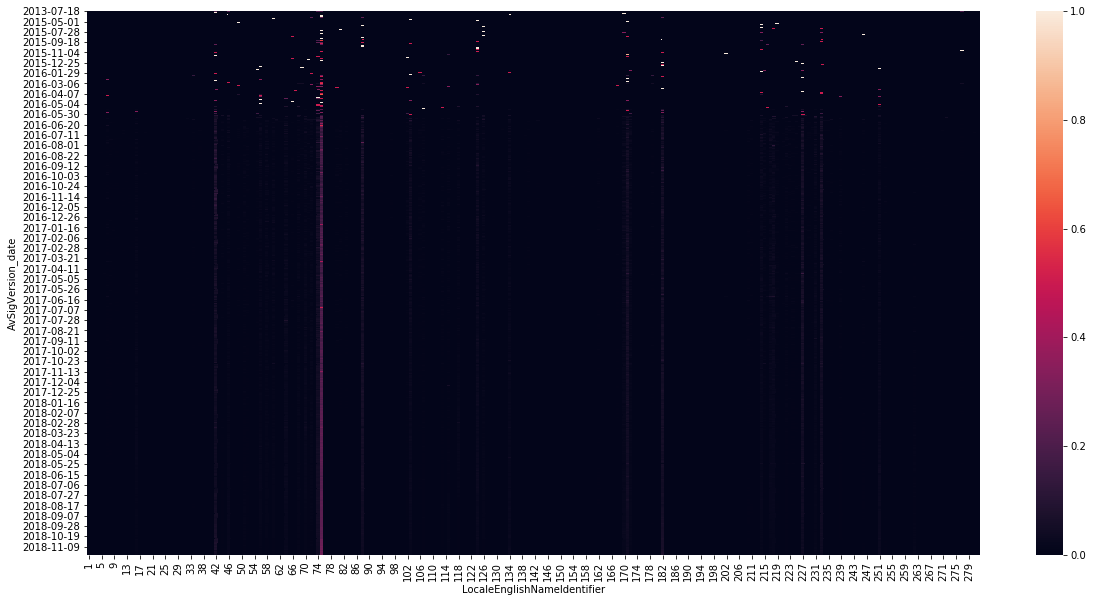

Platform


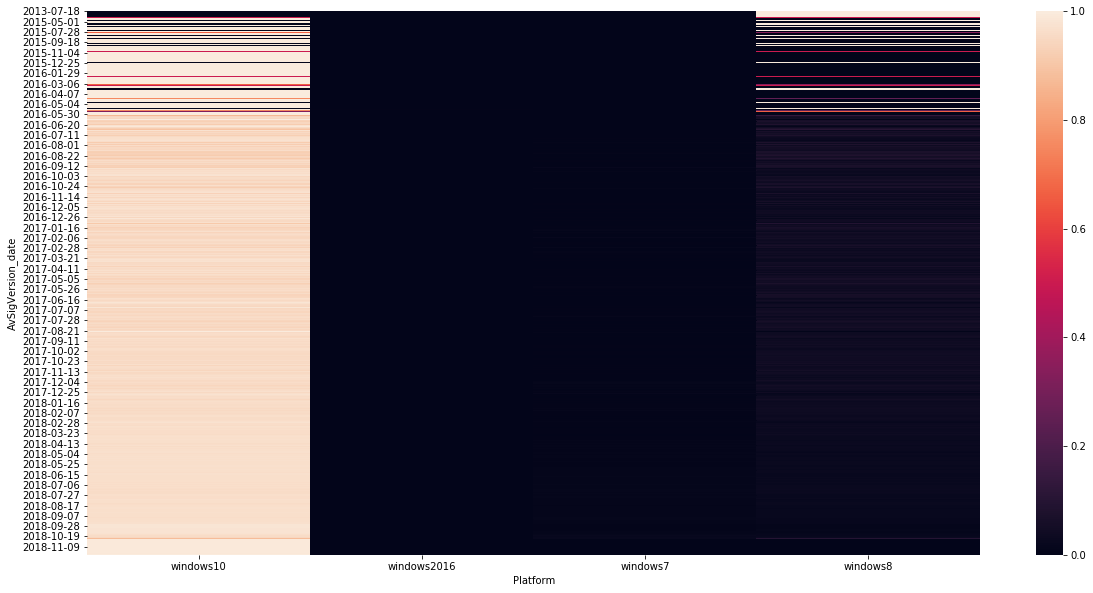

Processor


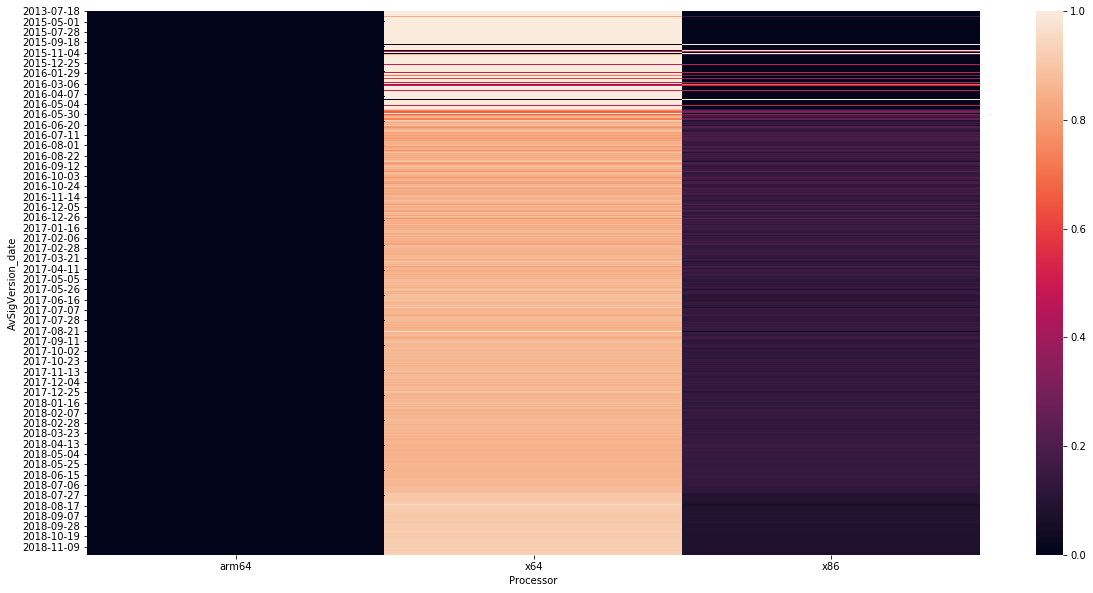

OsVer


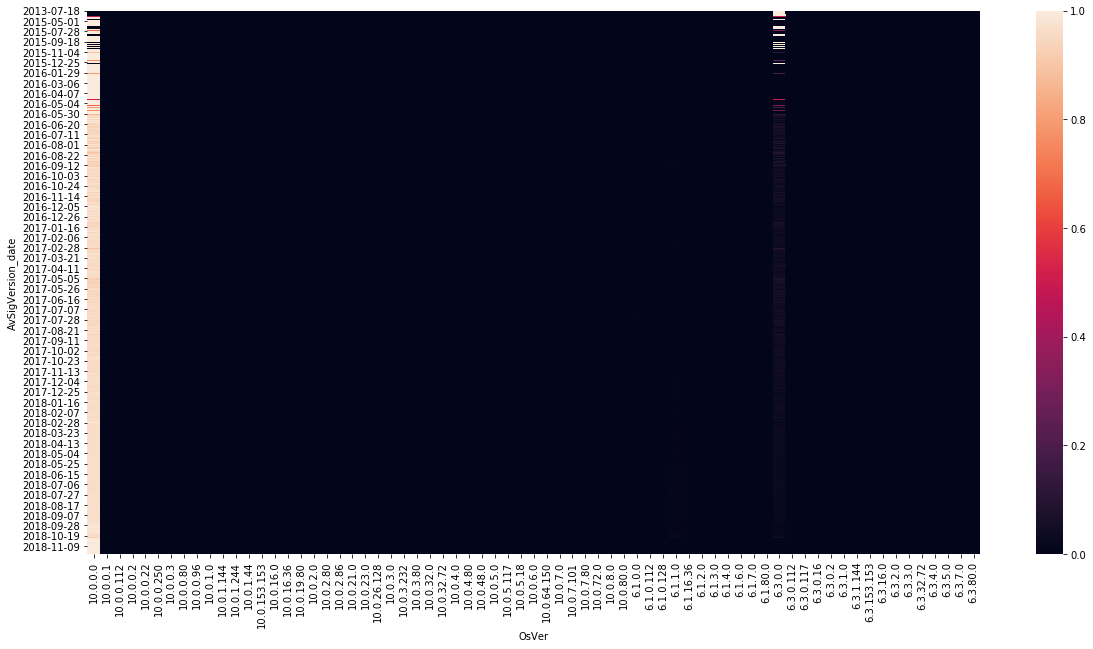

OsBuild


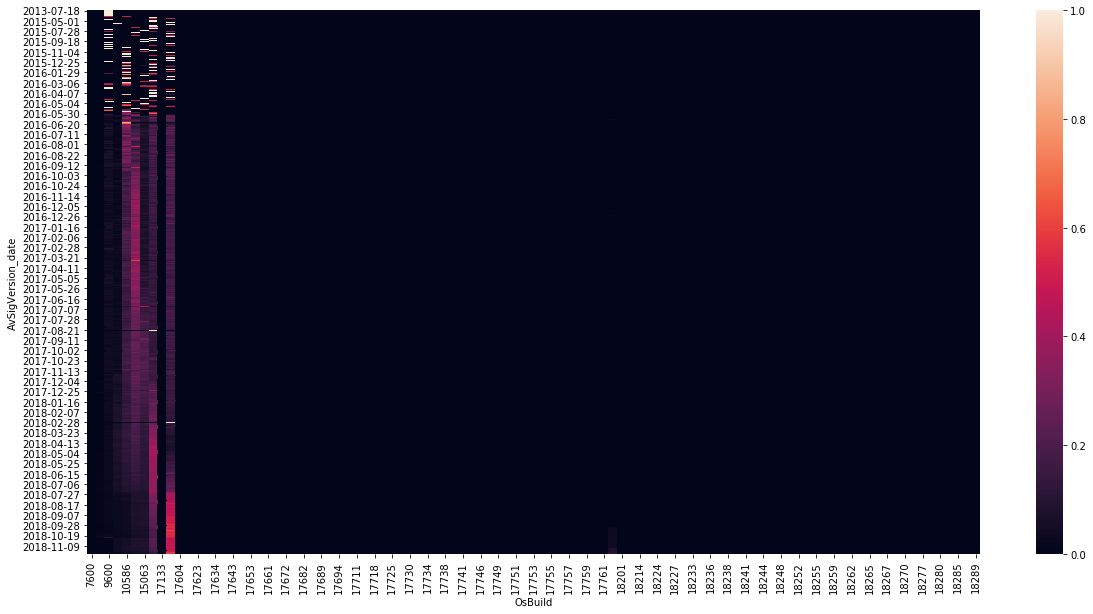

OsSuite


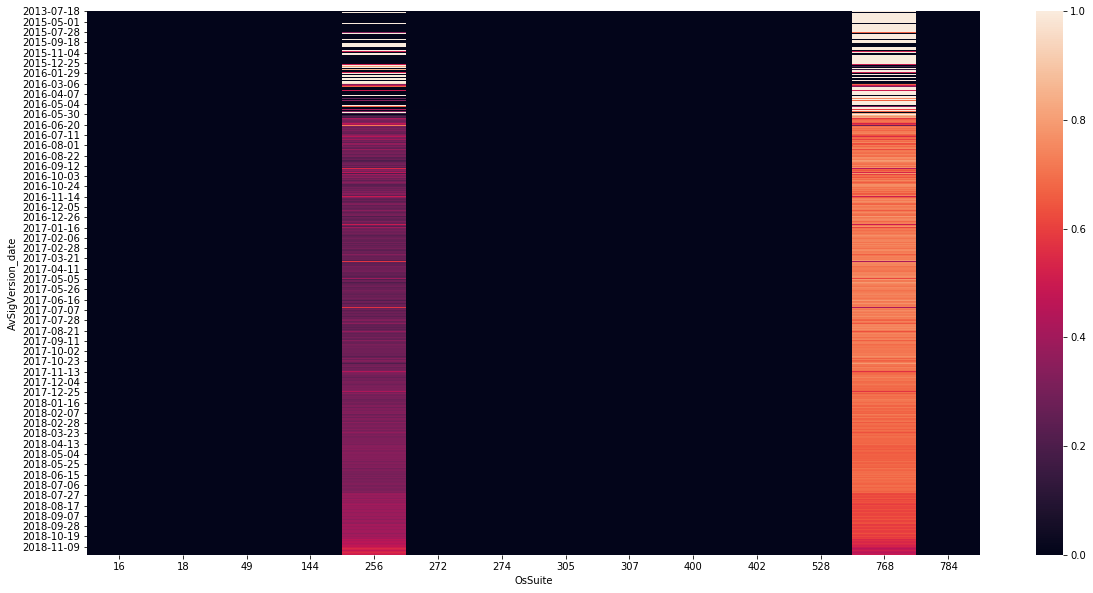

OsPlatformSubRelease


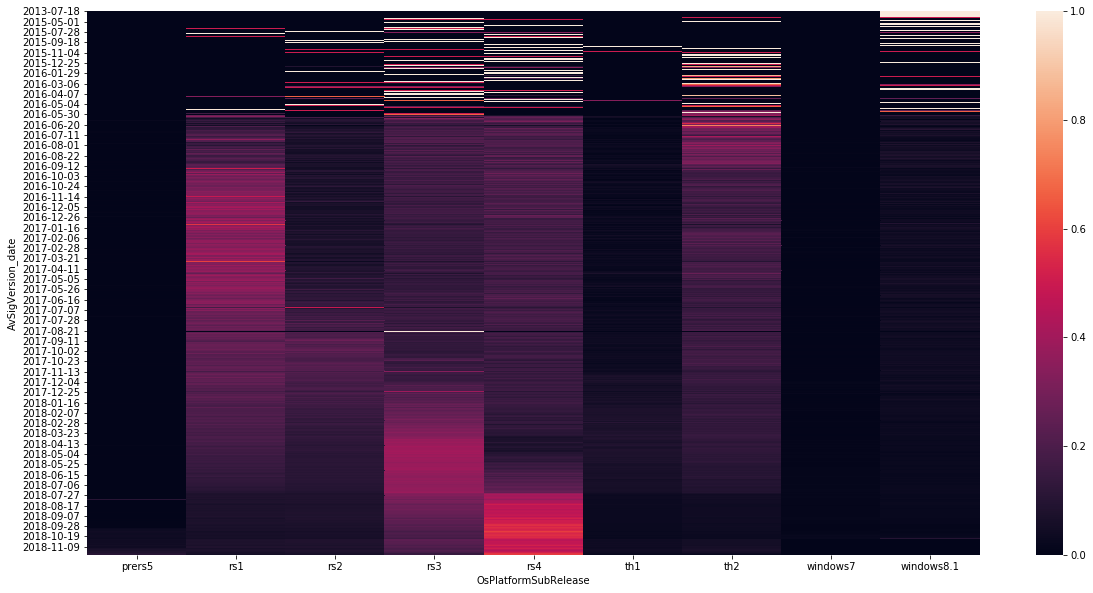

OsBuildLab


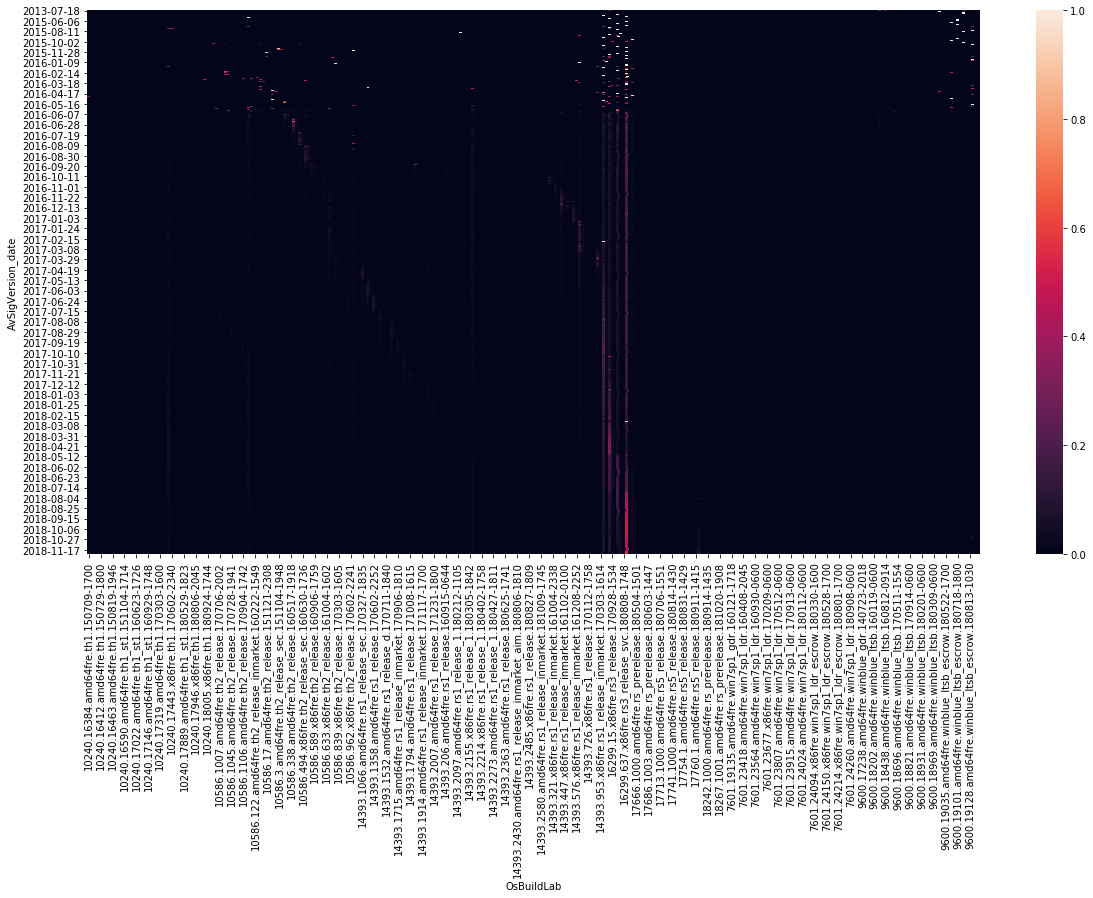

SkuEdition


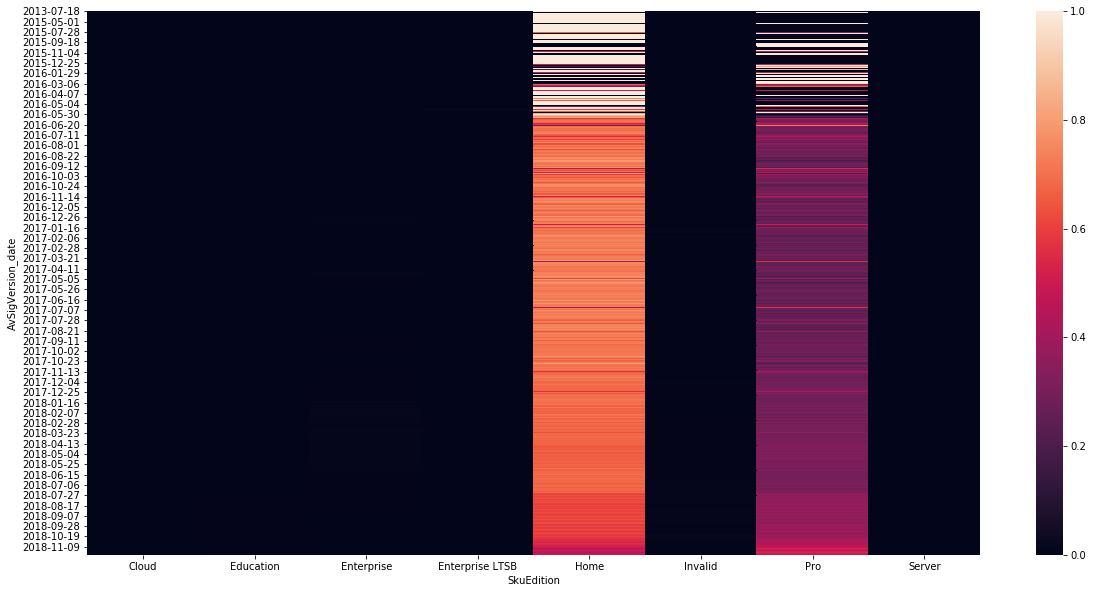

IsProtected


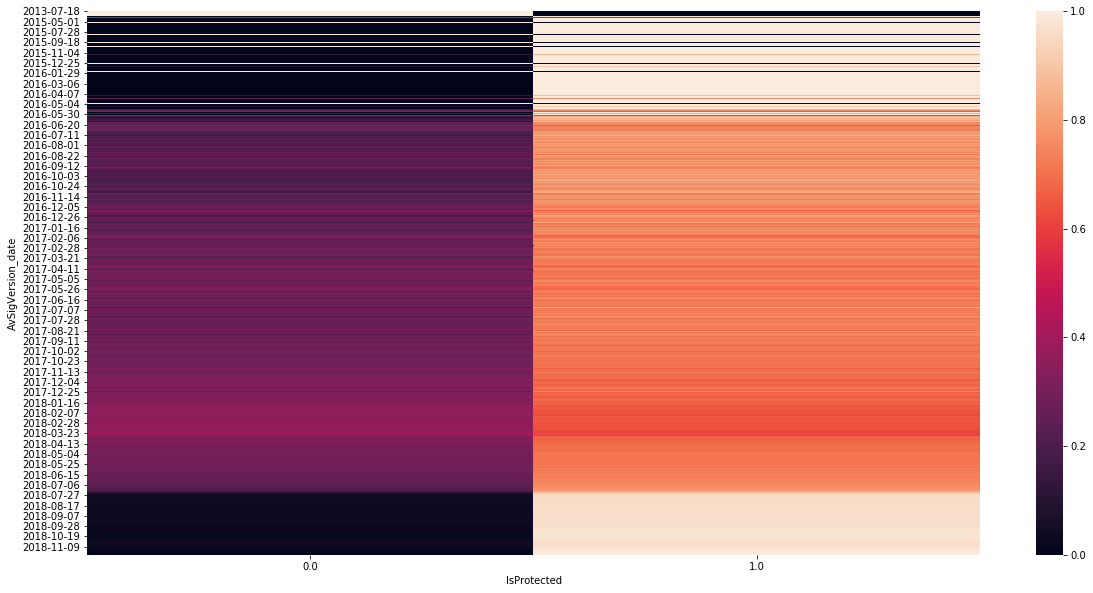

AutoSampleOptIn


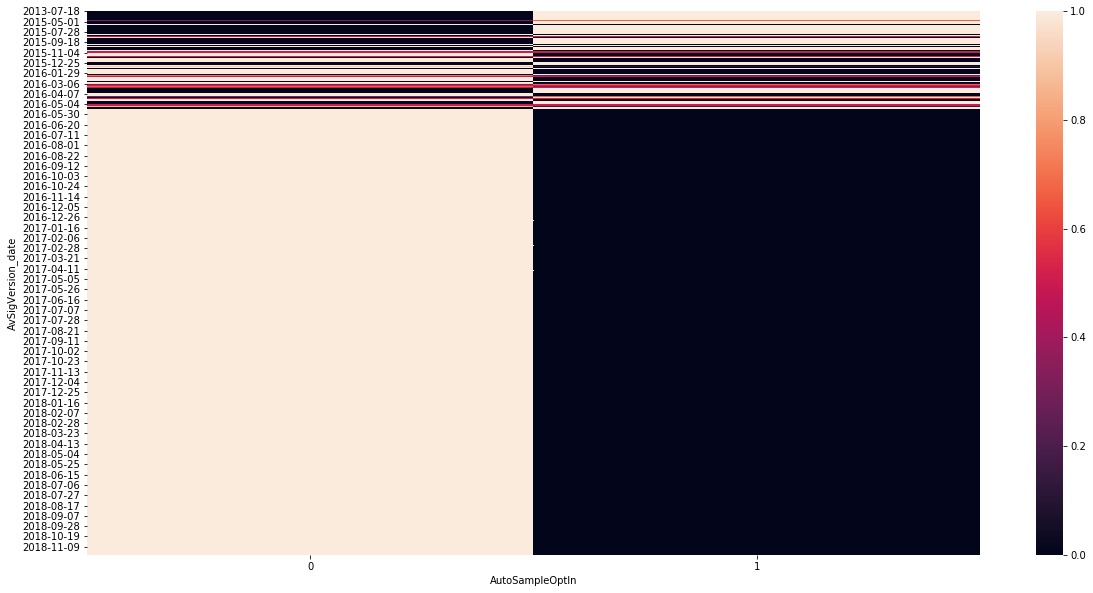

PuaMode


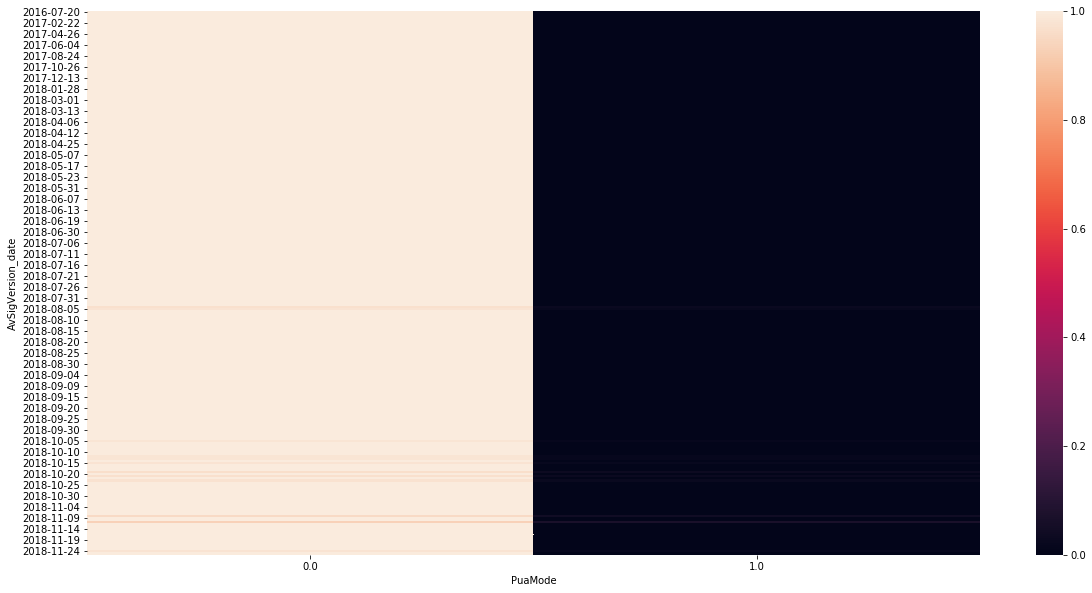

SMode


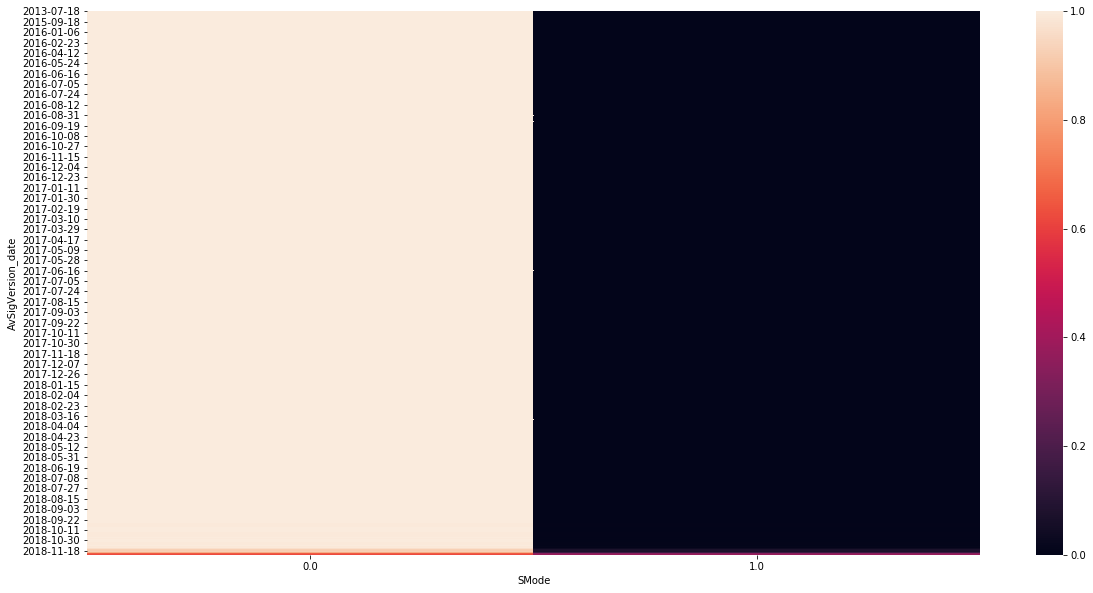

IeVerIdentifier


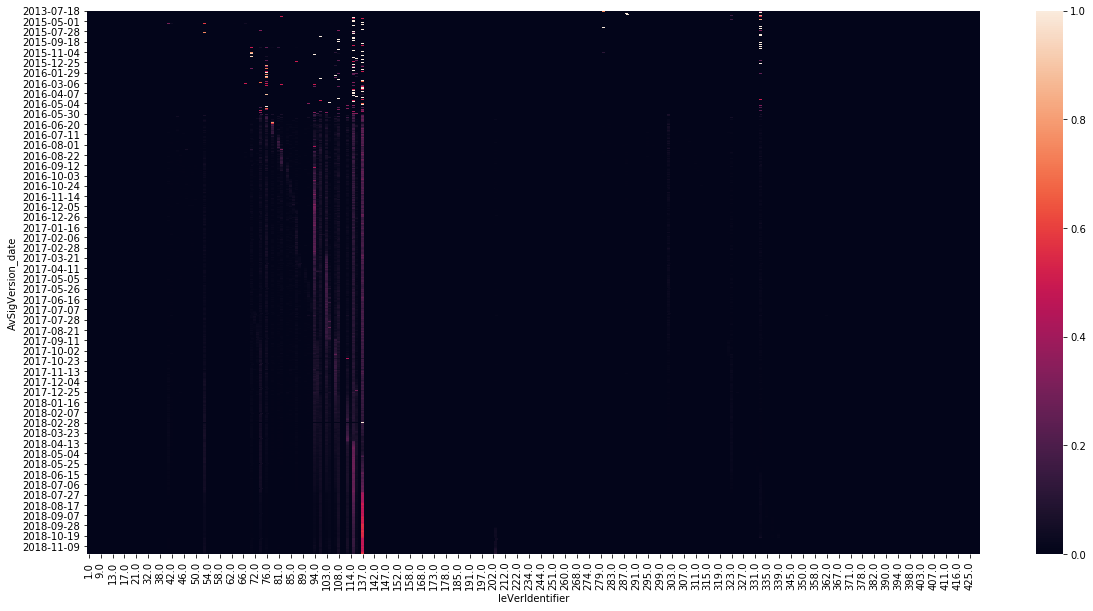

SmartScreen


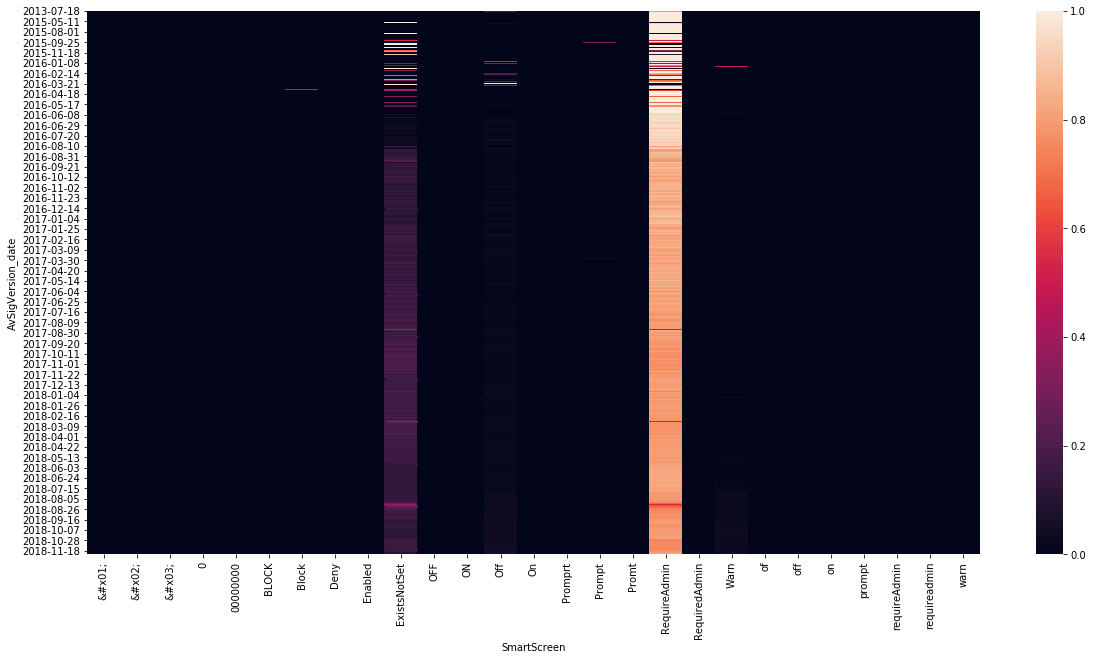

Firewall


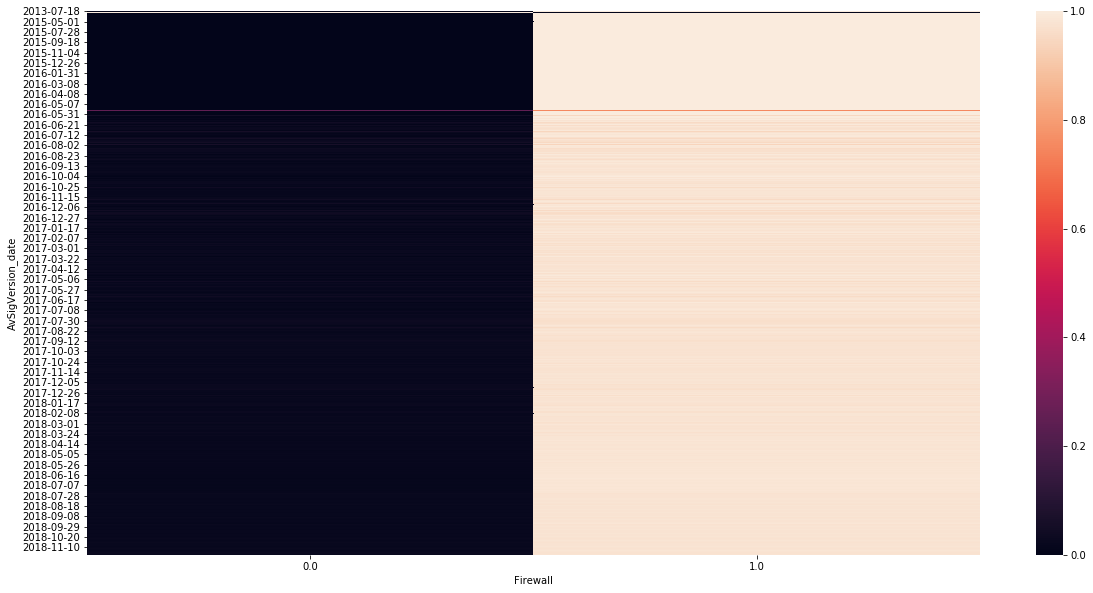

UacLuaenable


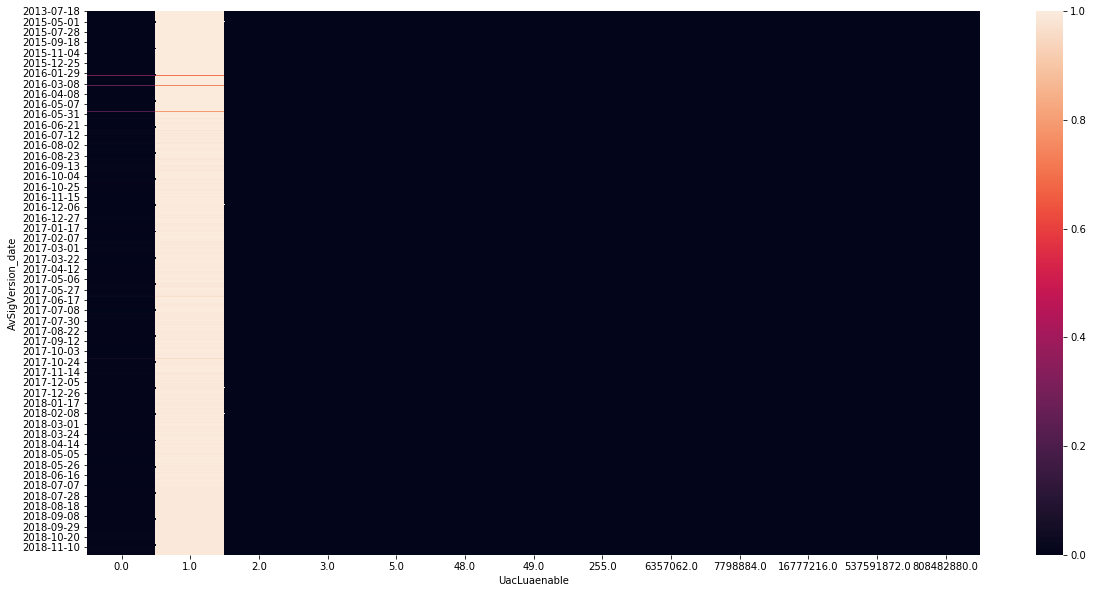

Census_MDC2FormFactor


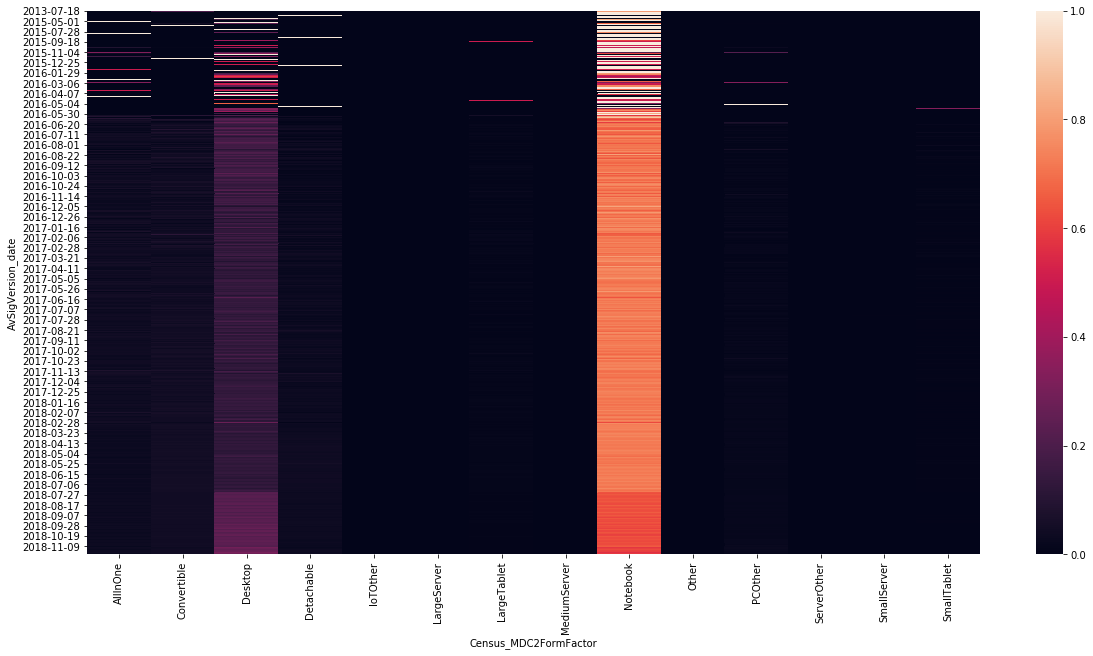

Census_DeviceFamily


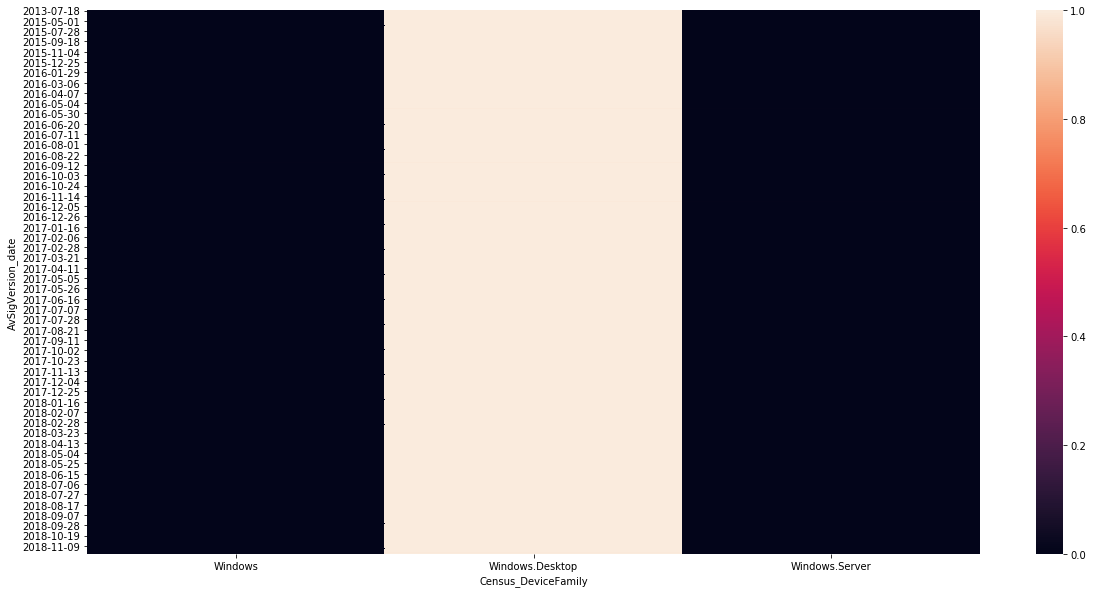

Census_OEMNameIdentifier


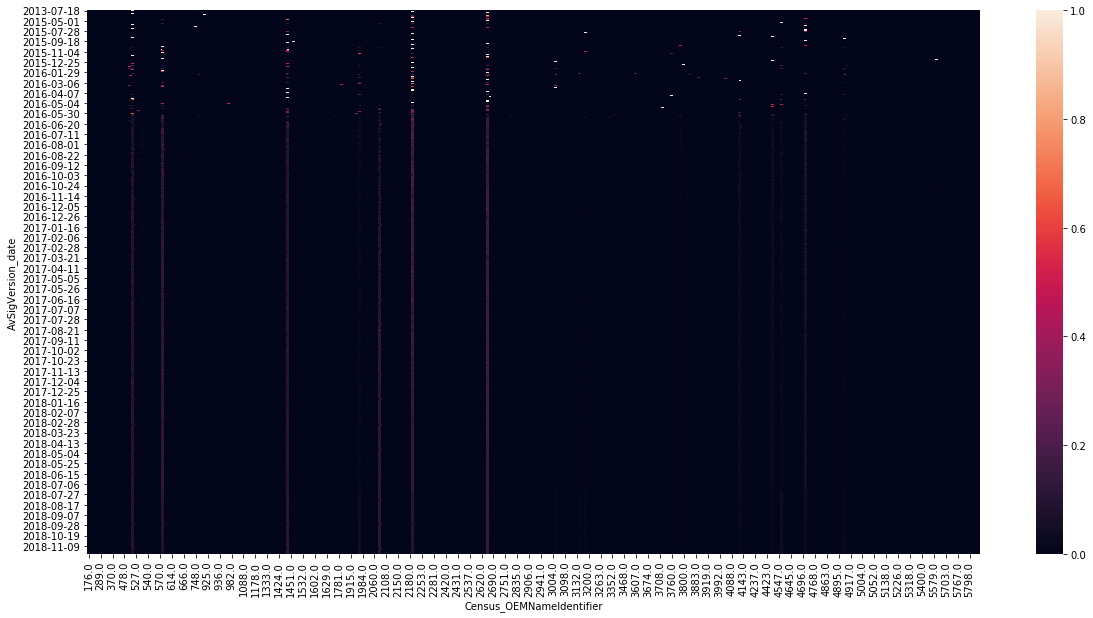

Census_OEMModelIdentifier


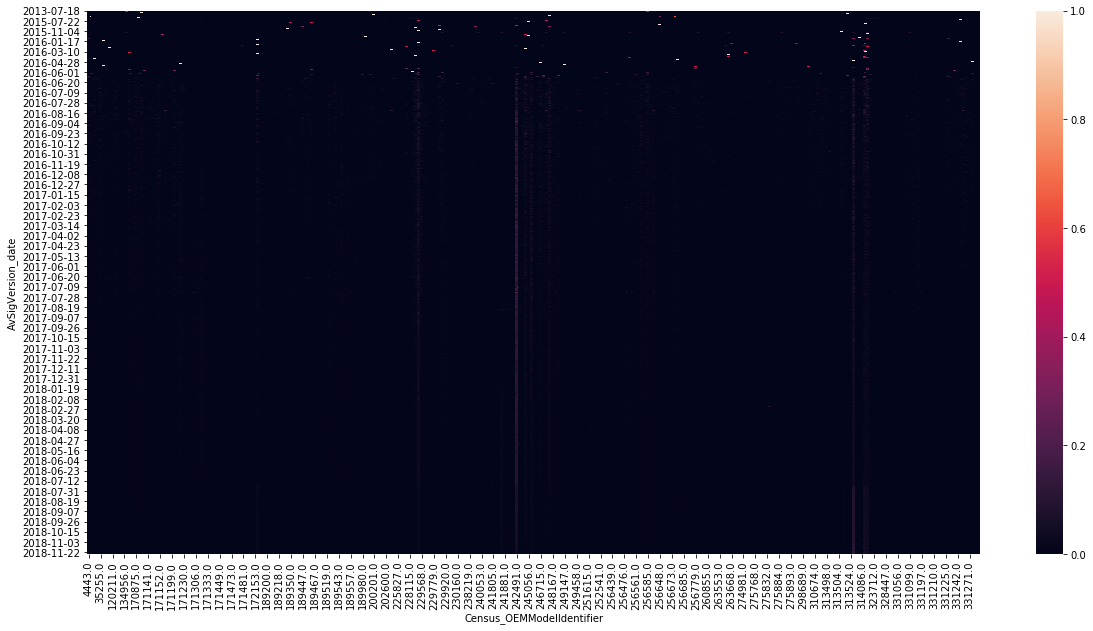

Census_ProcessorCoreCount


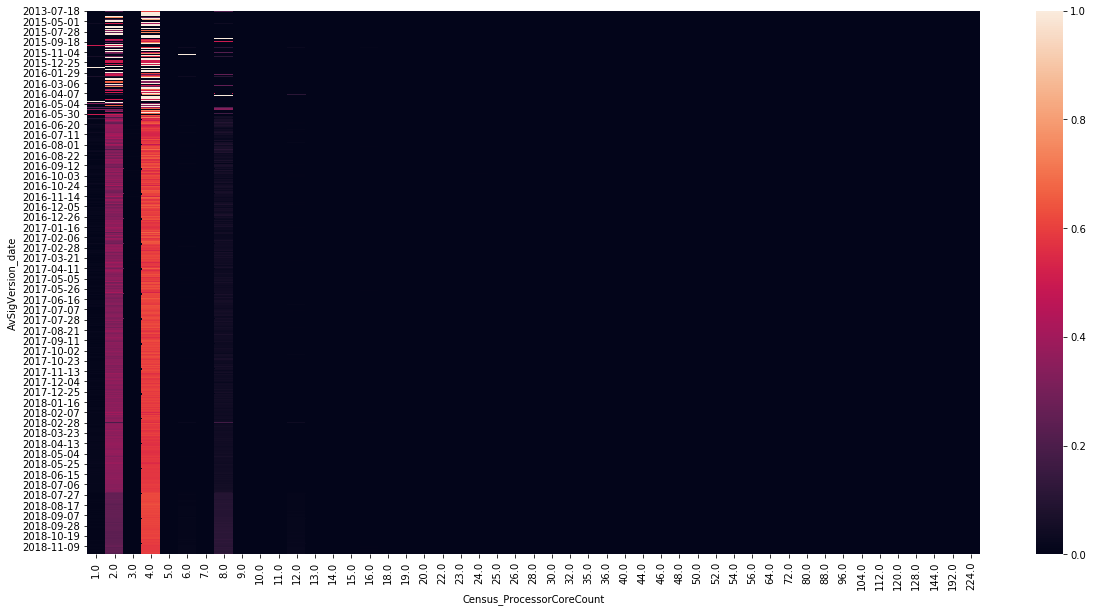

Census_ProcessorManufacturerIdentifier


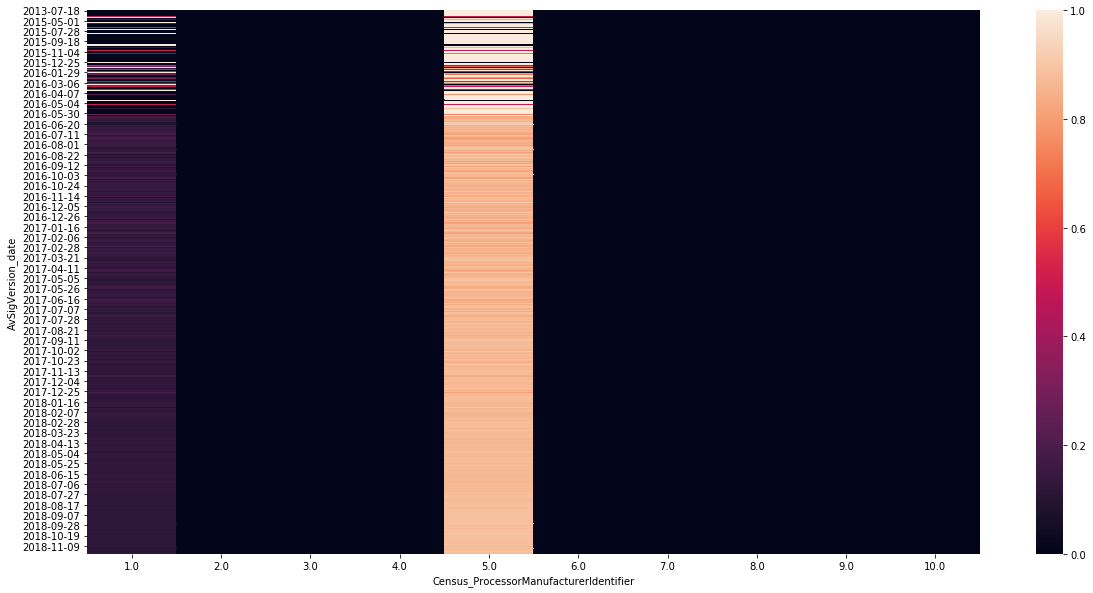

Census_ProcessorModelIdentifier


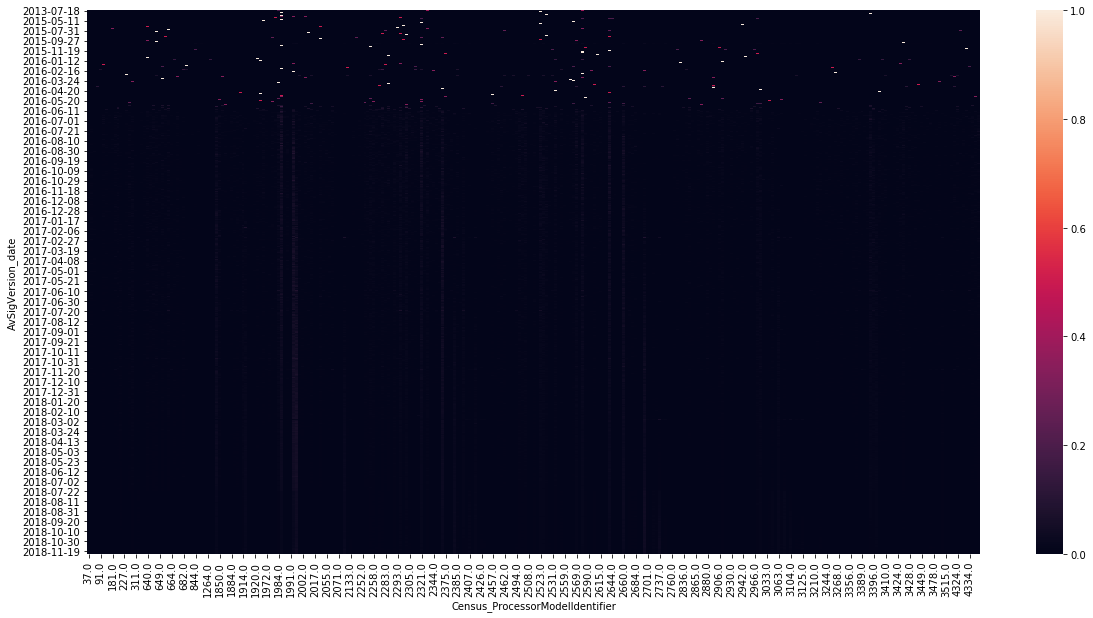

Census_ProcessorClass


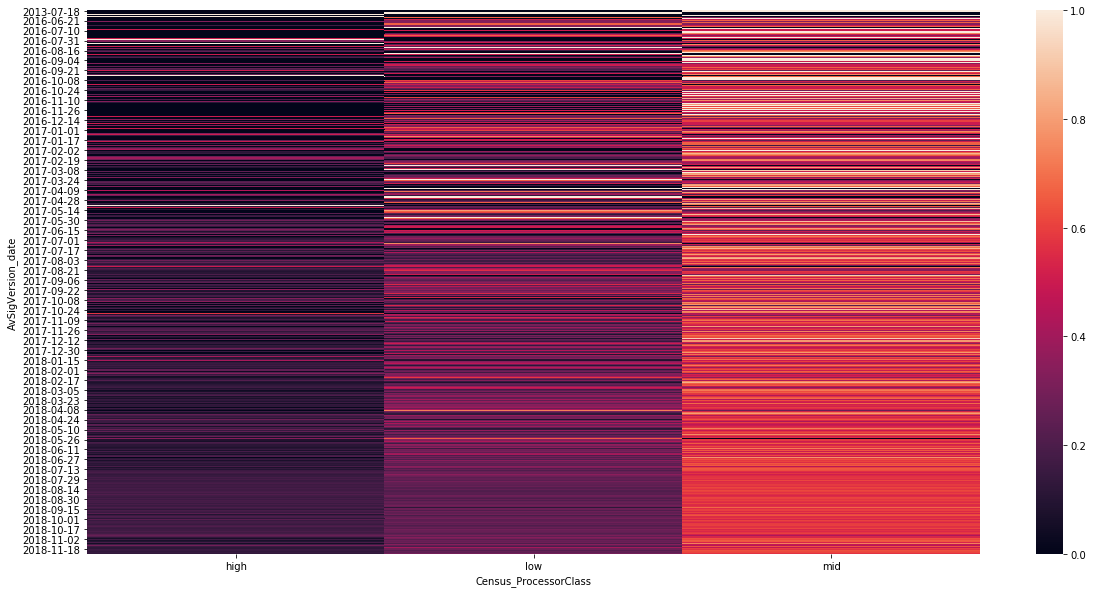

Census_PrimaryDiskTotalCapacity


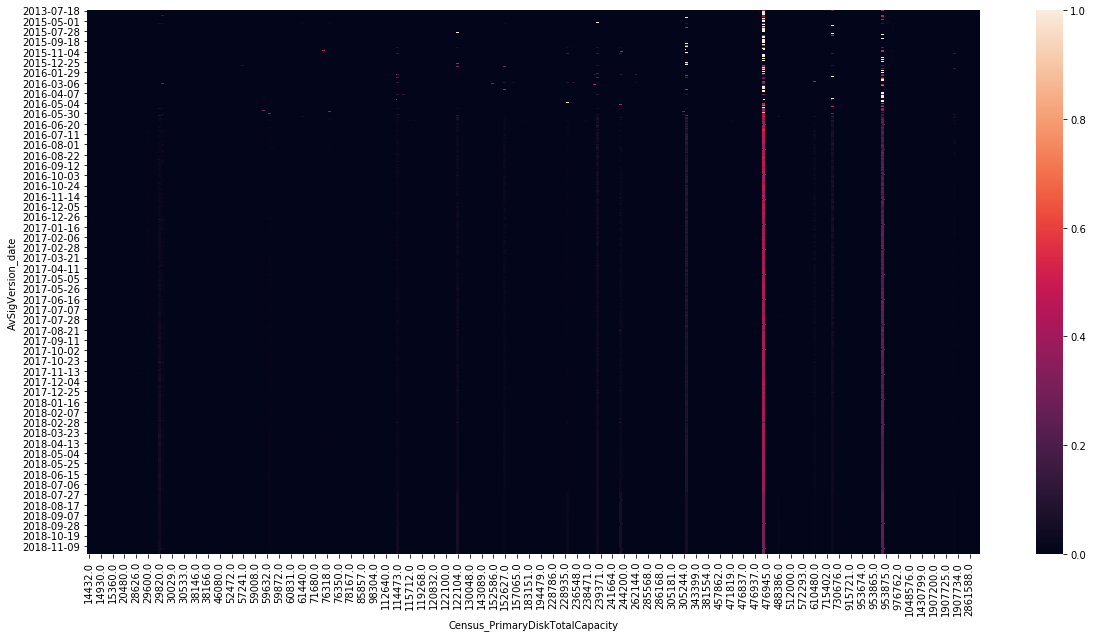

Census_PrimaryDiskTypeName


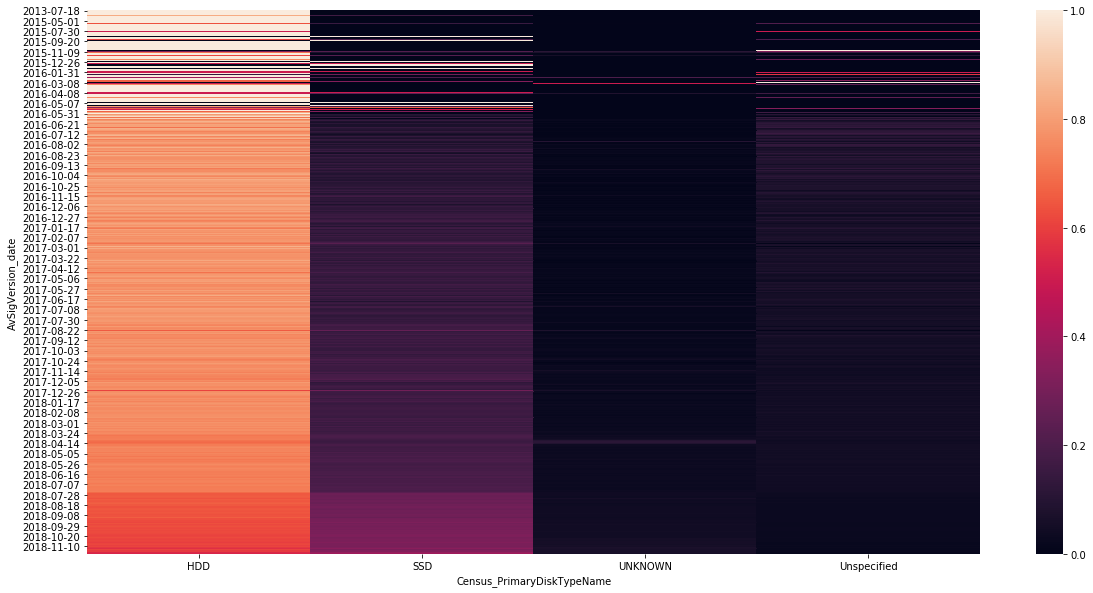

Census_SystemVolumeTotalCapacity


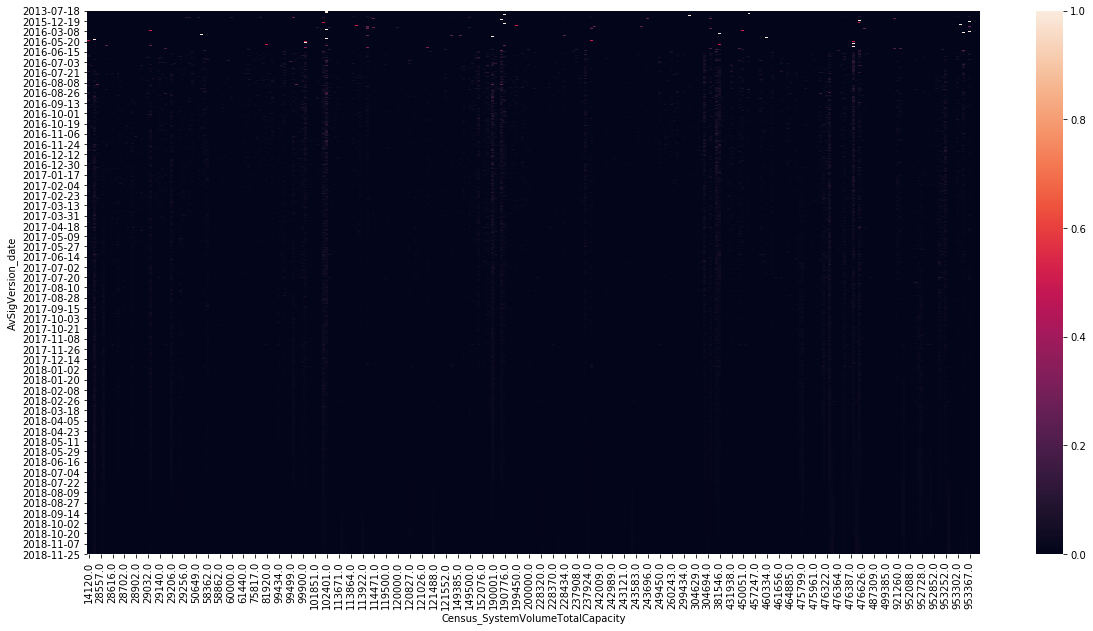

Census_HasOpticalDiskDrive


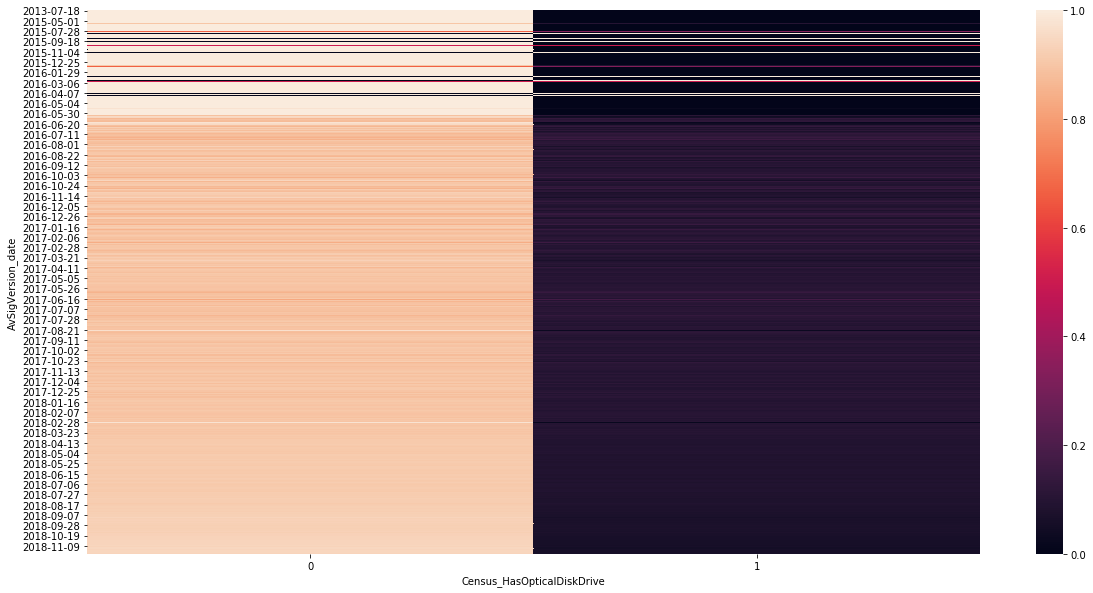

Census_TotalPhysicalRAM


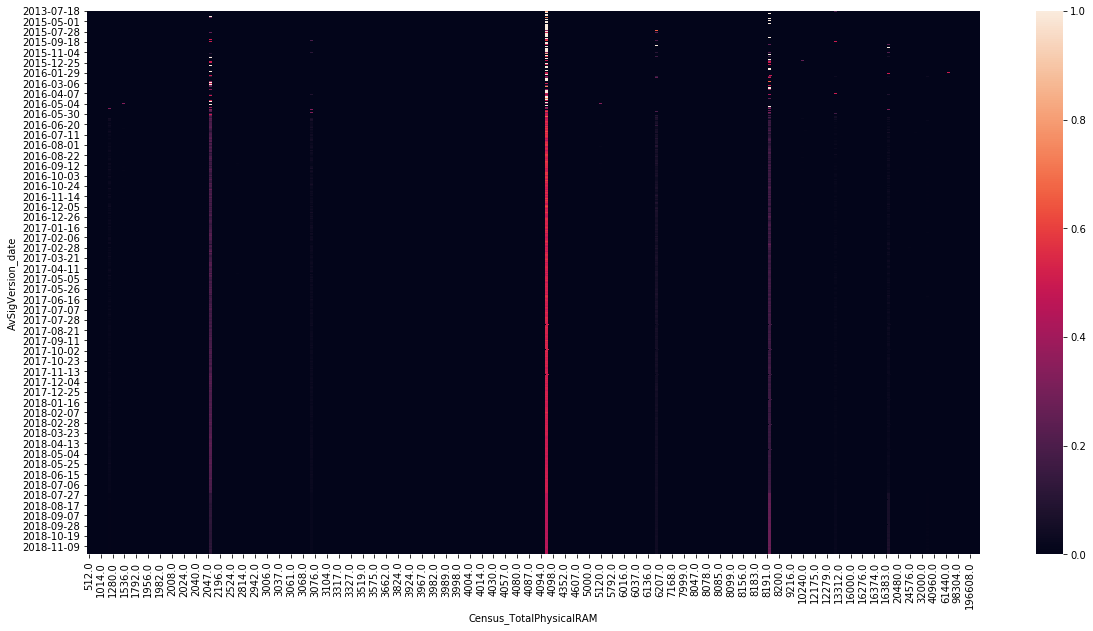

Census_ChassisTypeName


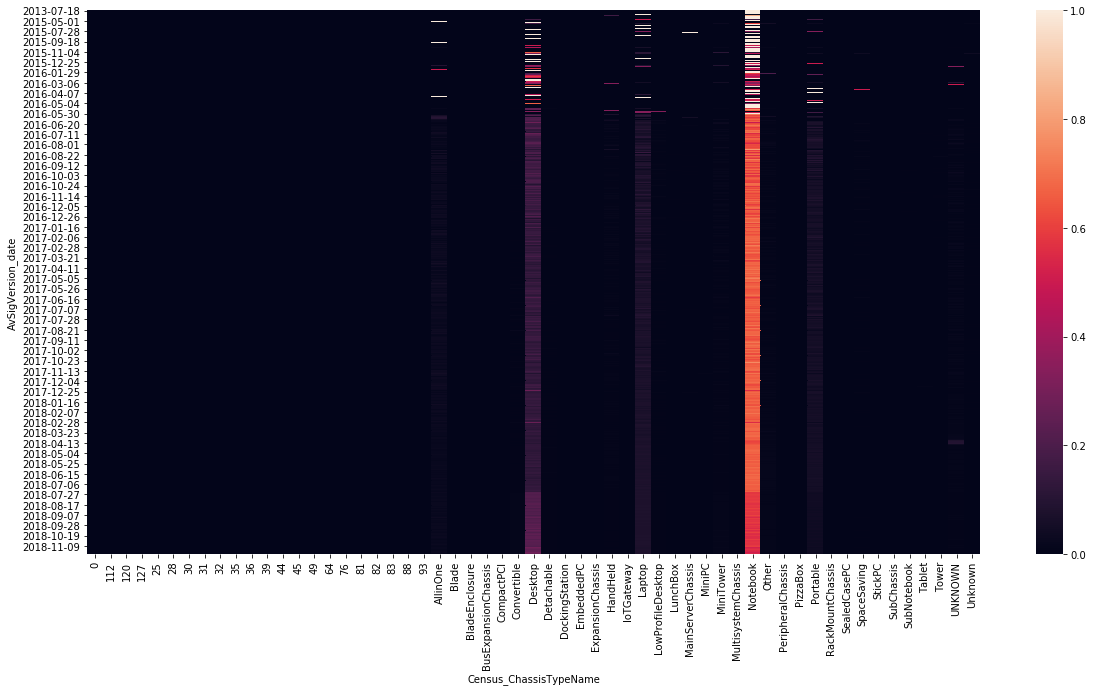

Census_InternalPrimaryDiagonalDisplaySizeInInches


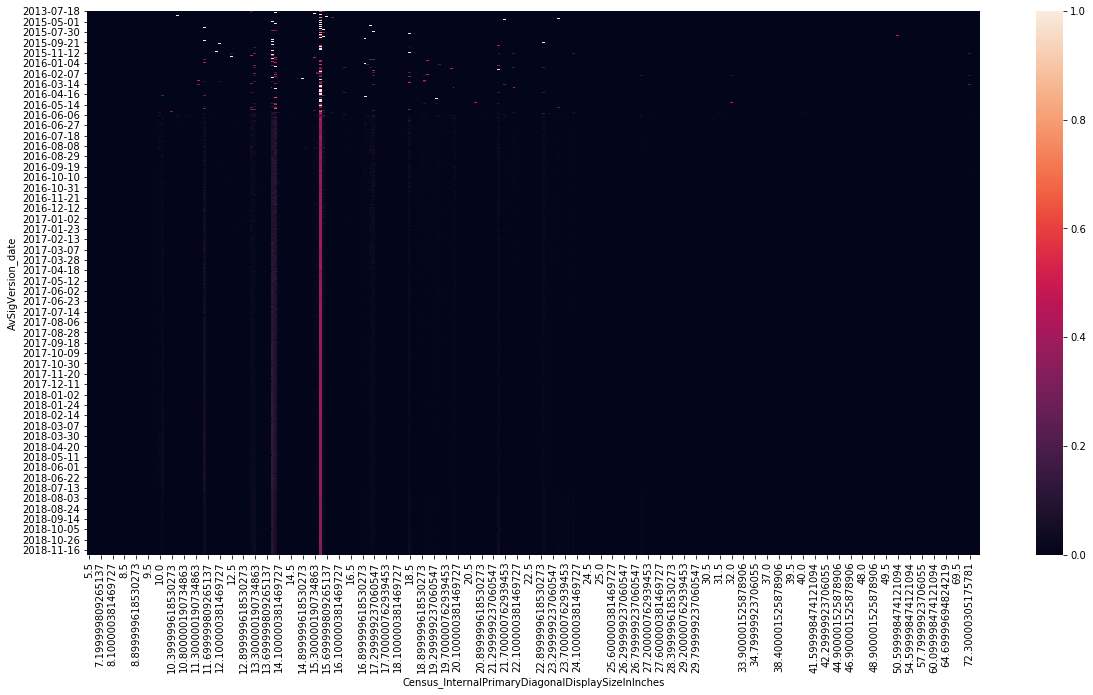

Census_InternalPrimaryDisplayResolutionHorizontal


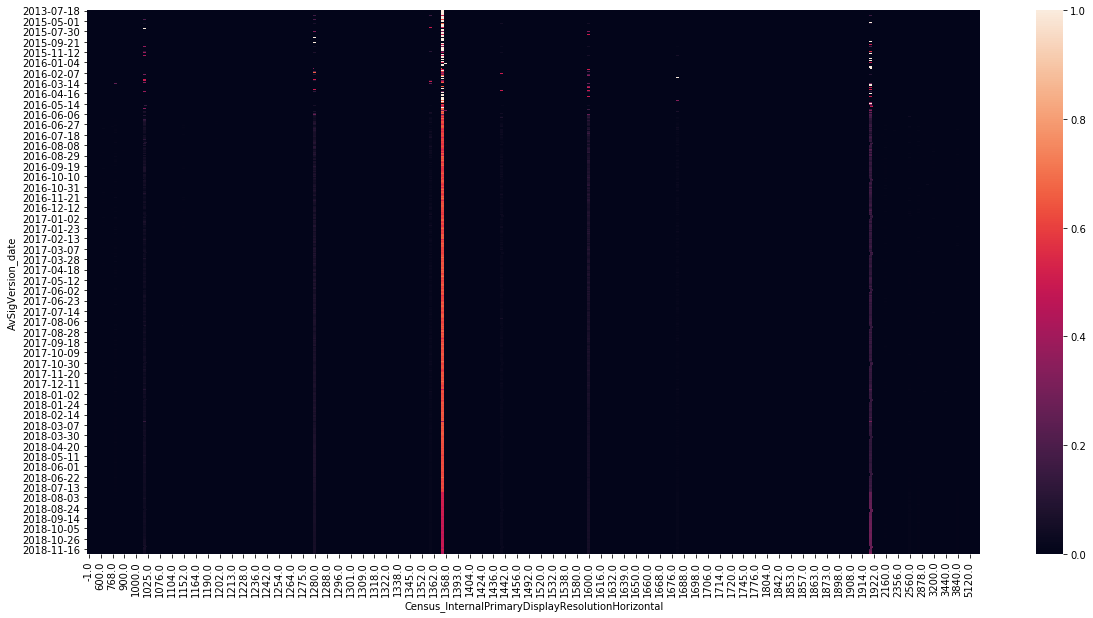

Census_InternalPrimaryDisplayResolutionVertical


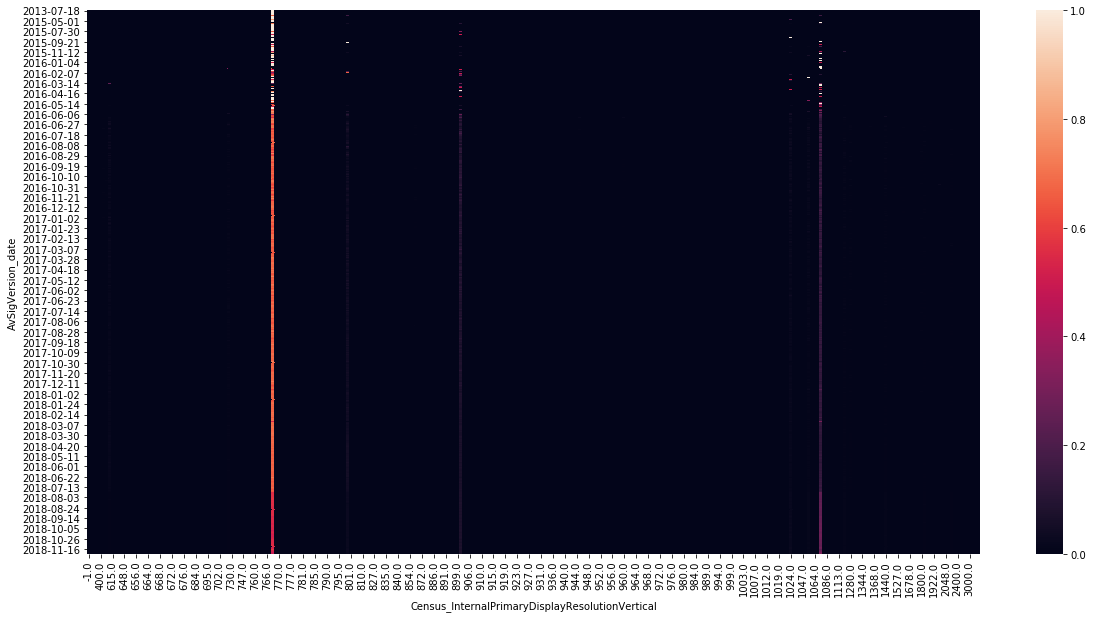

Census_PowerPlatformRoleName


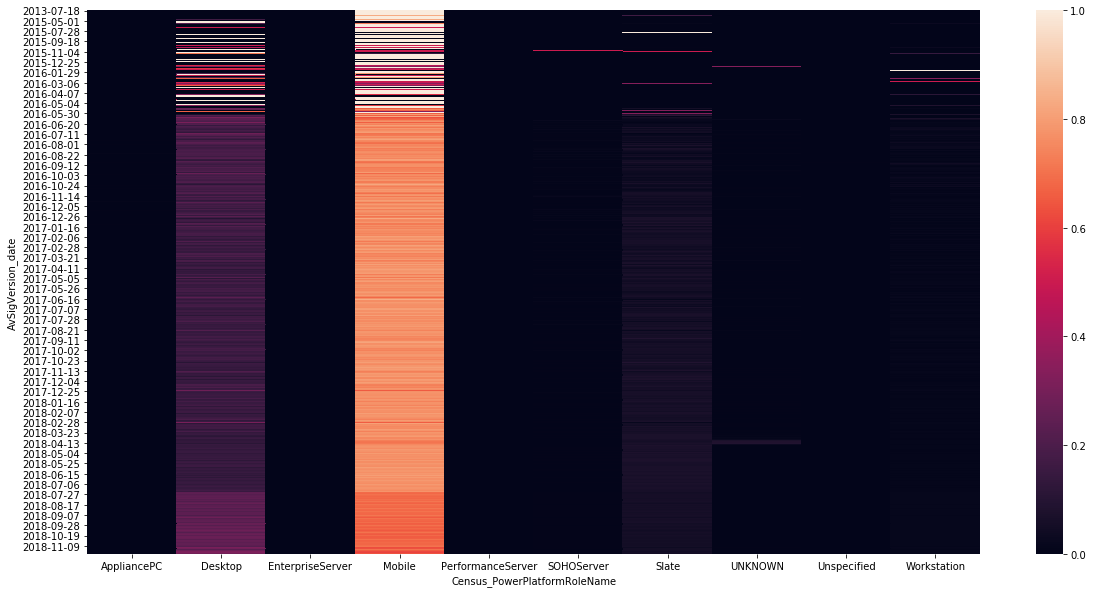

Census_InternalBatteryType


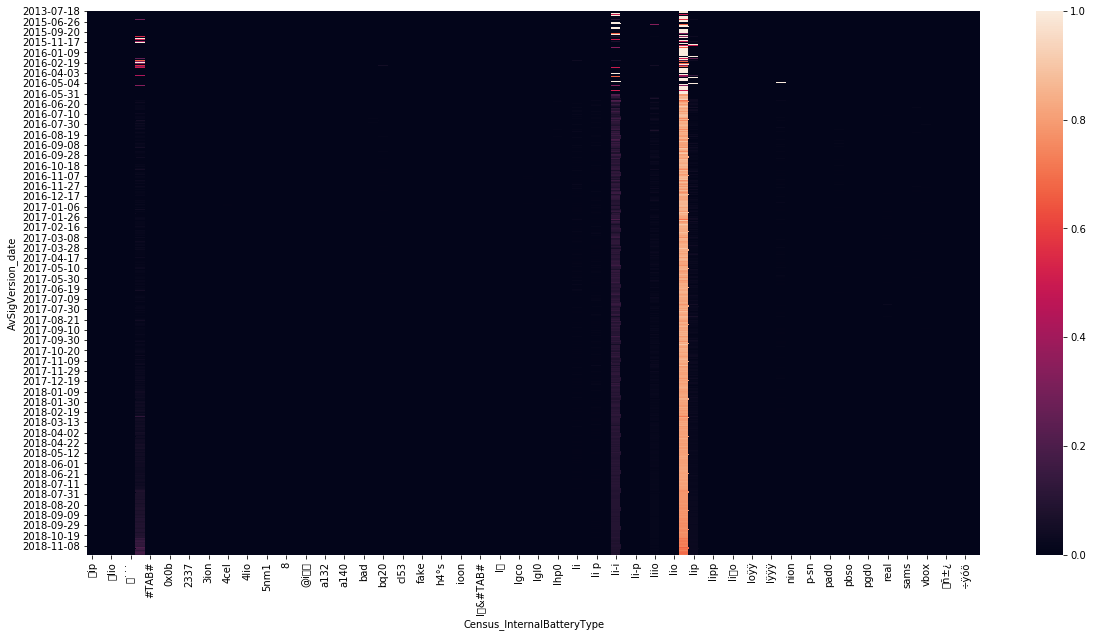

Census_InternalBatteryNumberOfCharges


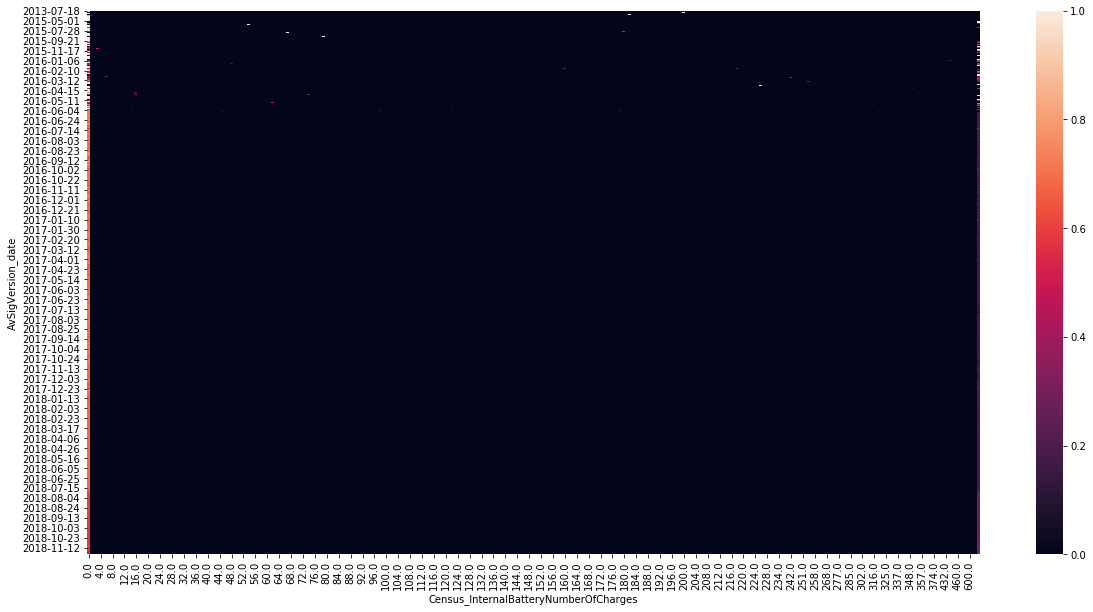

Census_OSVersion


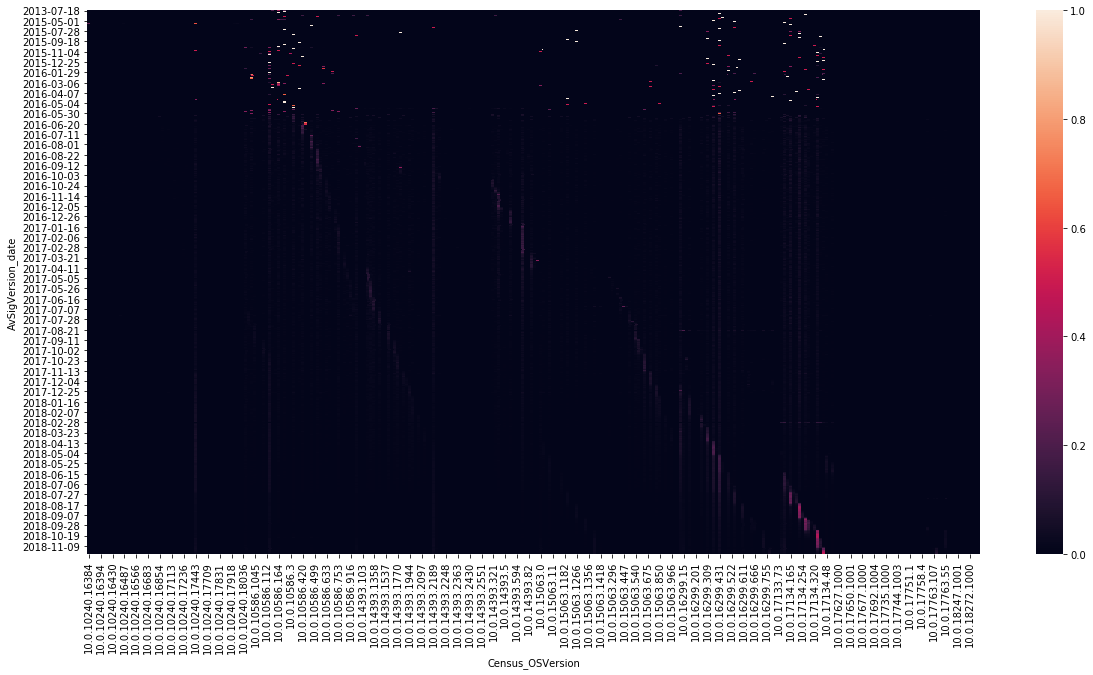

Census_OSArchitecture


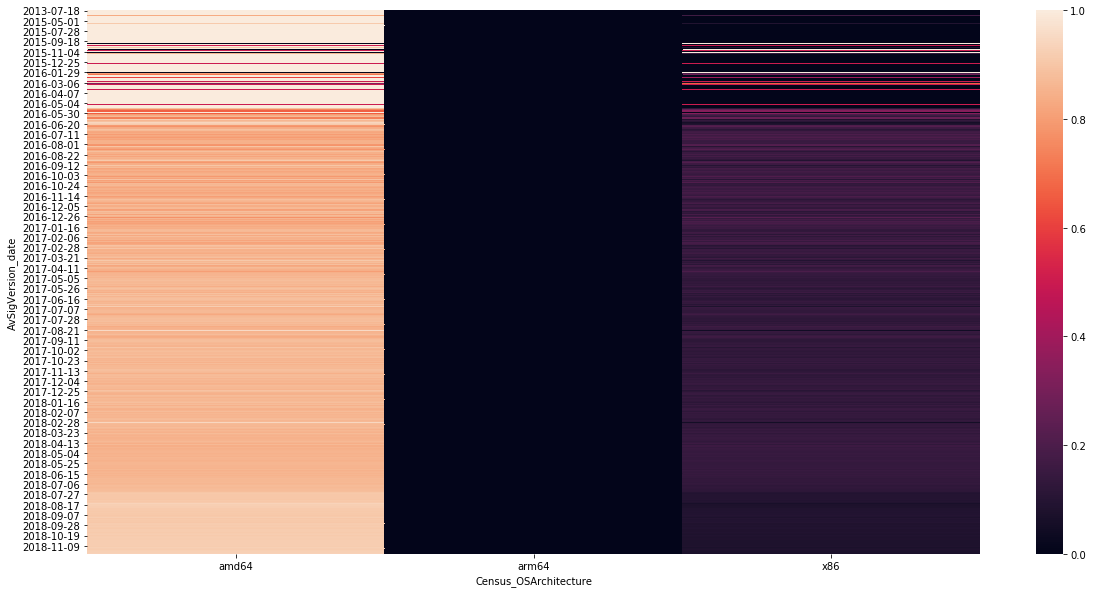

Census_OSBranch


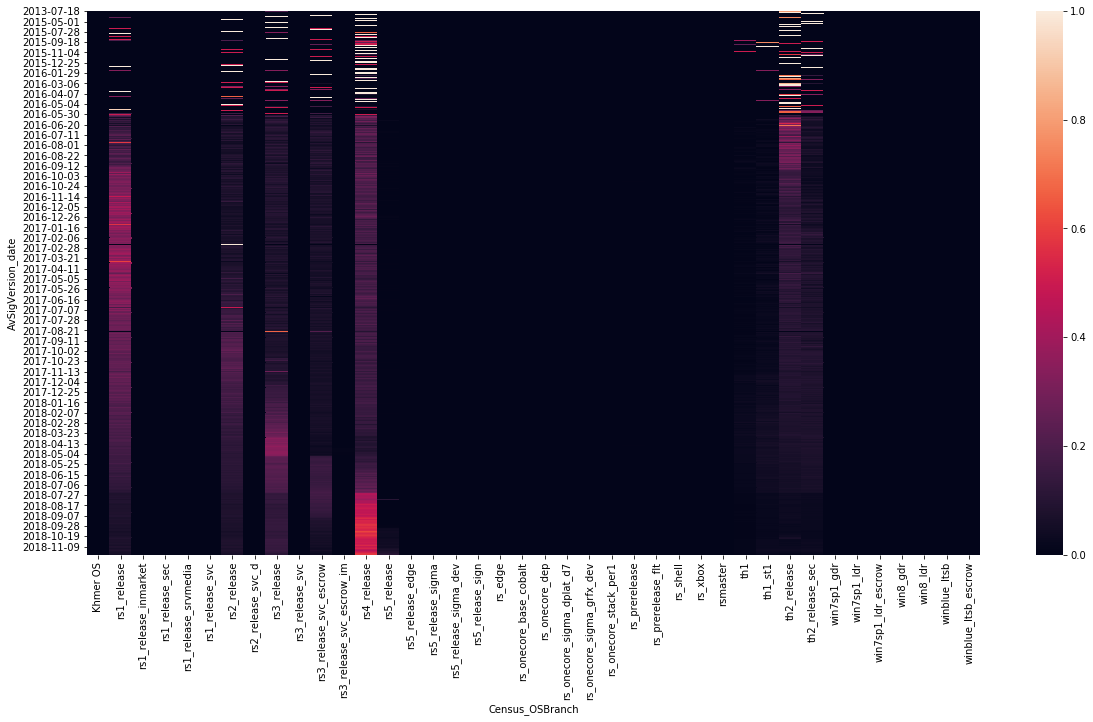

Census_OSBuildNumber


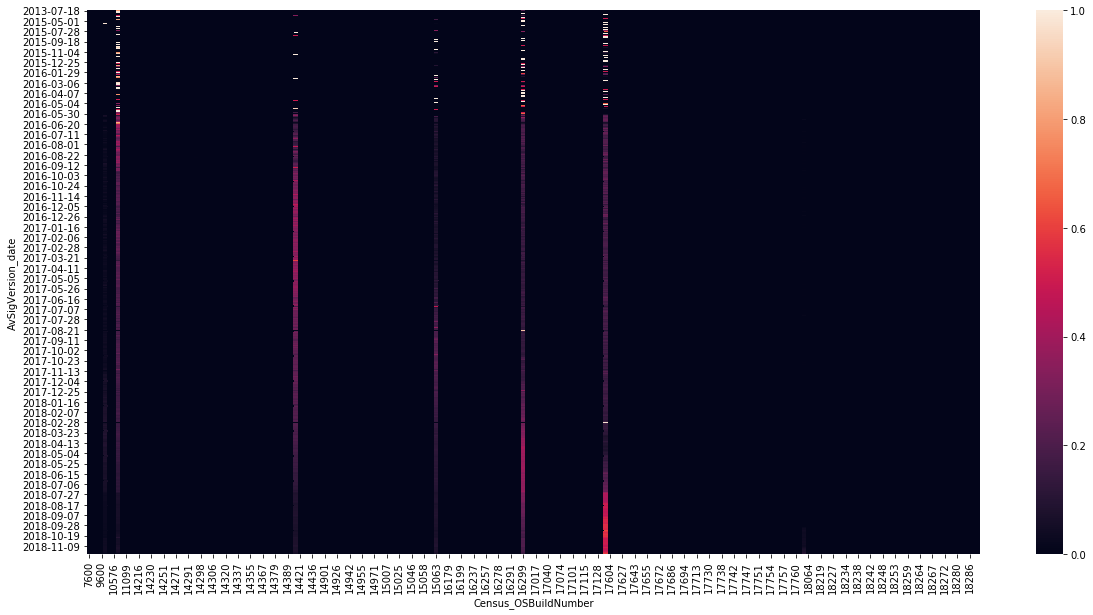

Census_OSBuildRevision


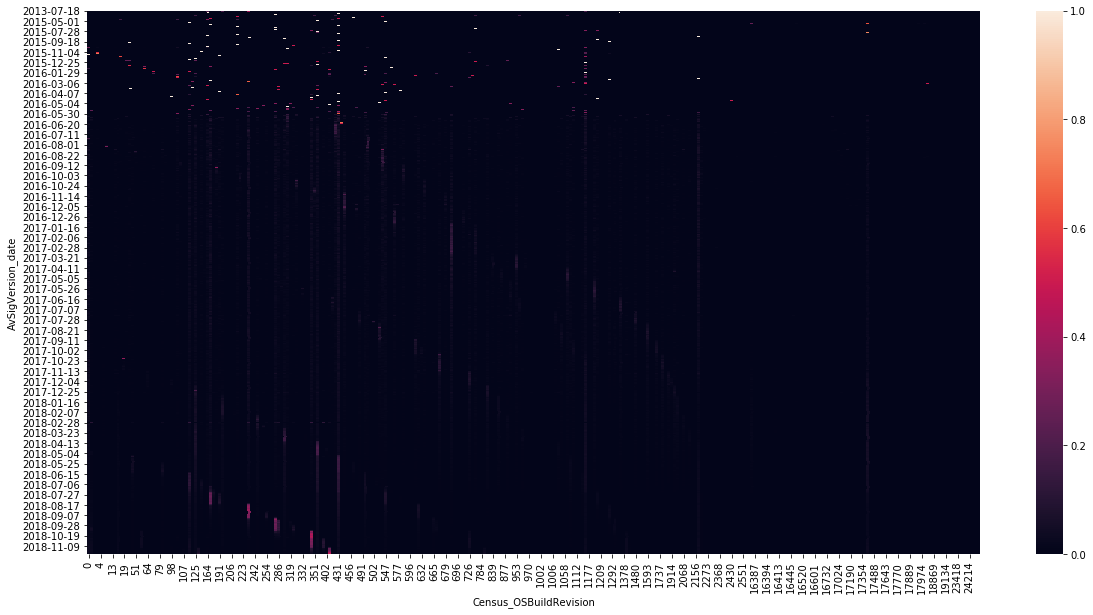

Census_OSEdition


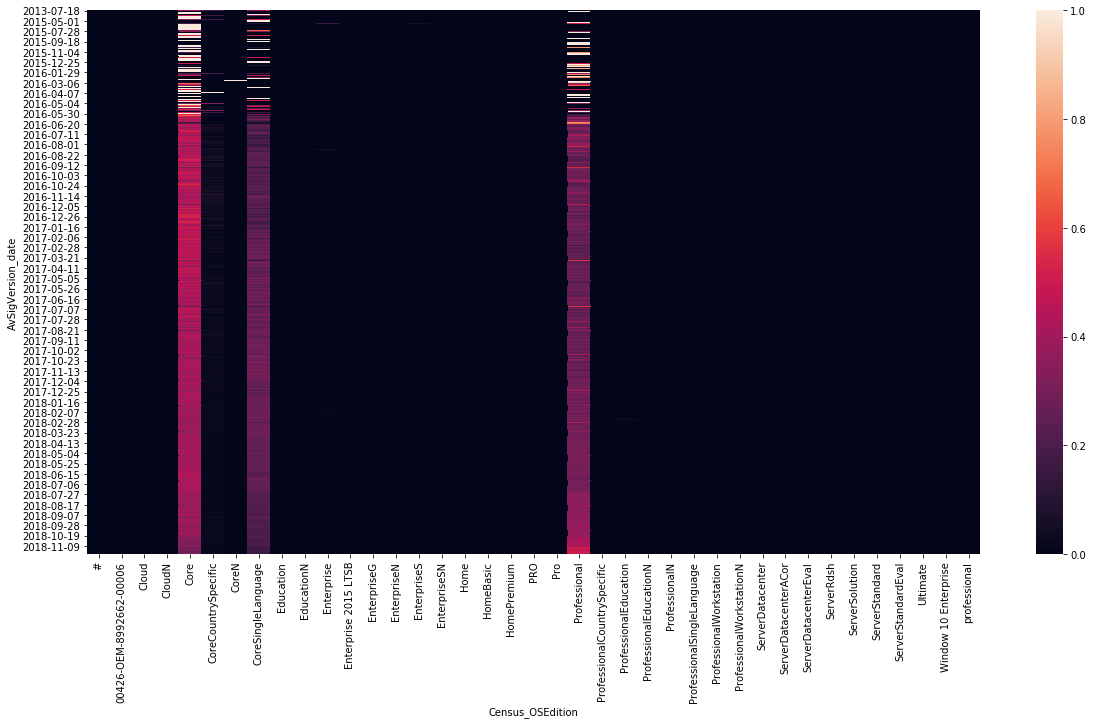

Census_OSSkuName


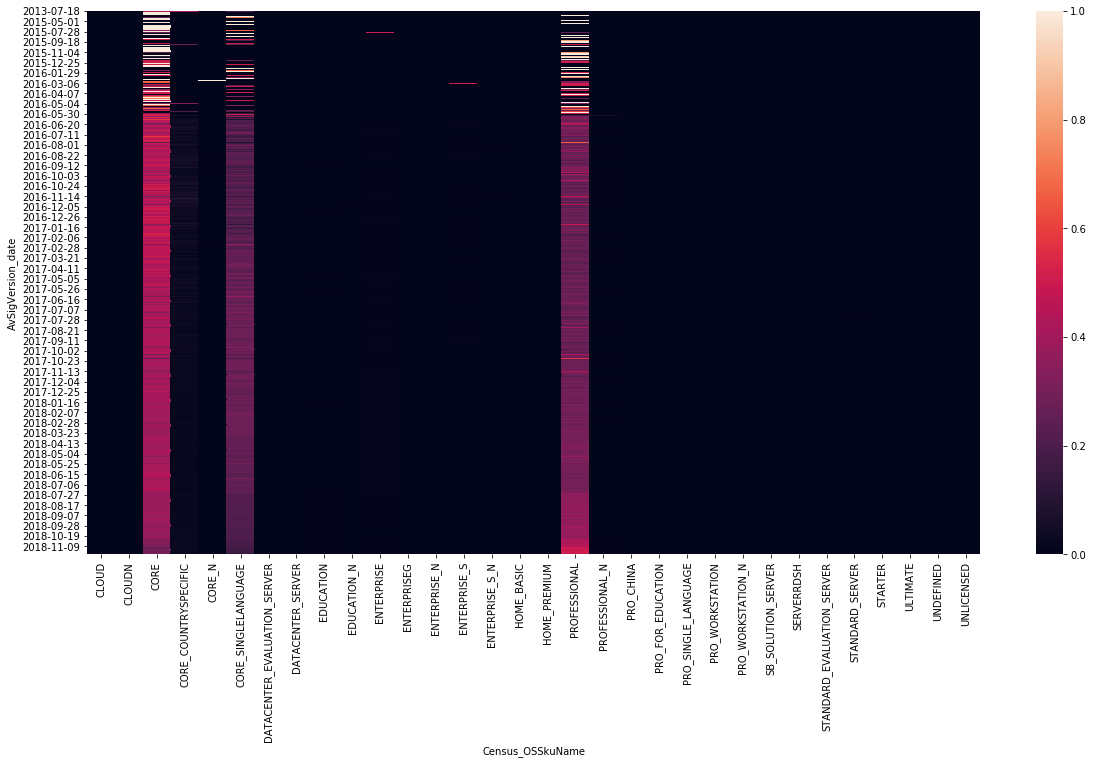

Census_OSInstallTypeName


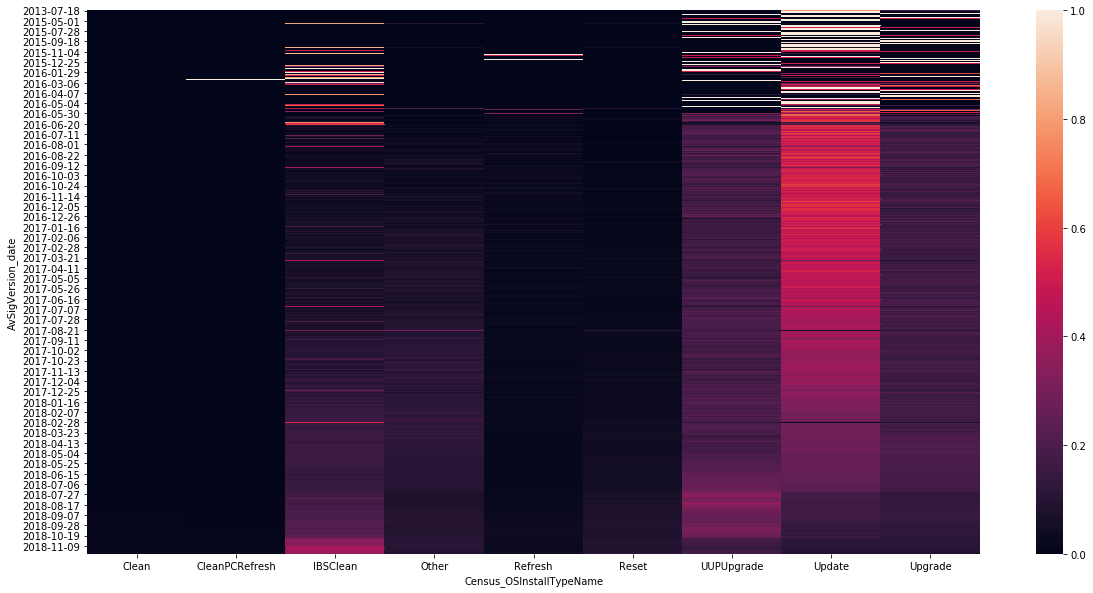

Census_OSInstallLanguageIdentifier


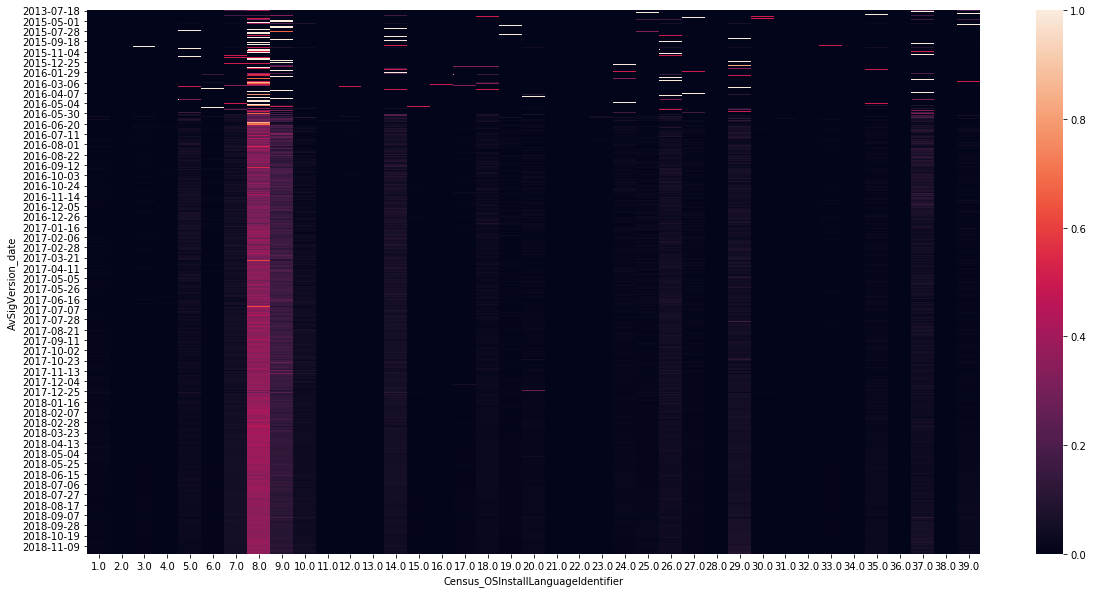

Census_OSUILocaleIdentifier


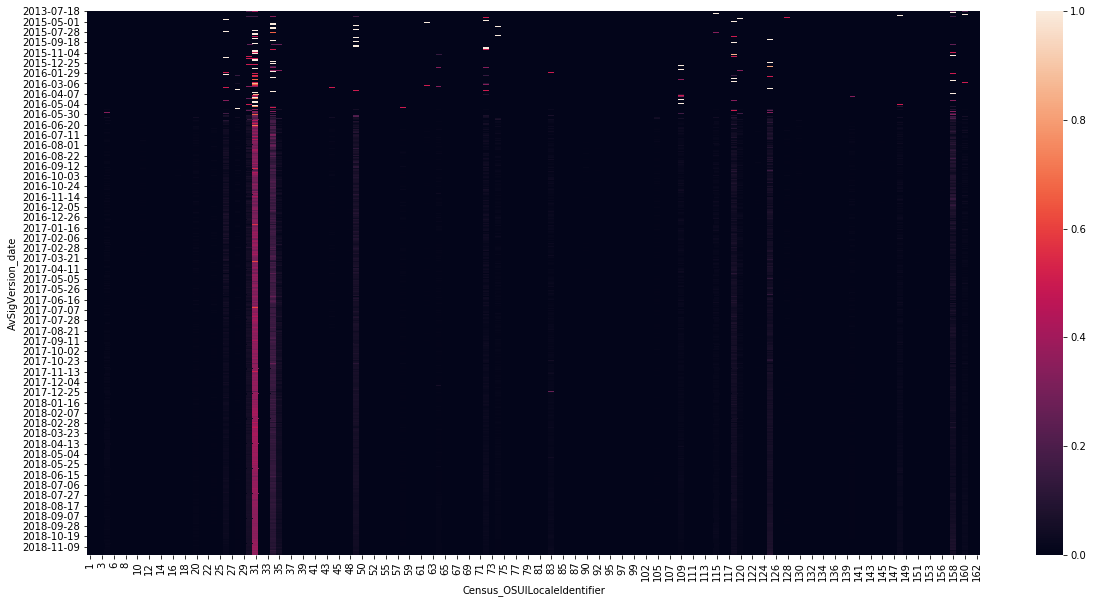

Census_OSWUAutoUpdateOptionsName


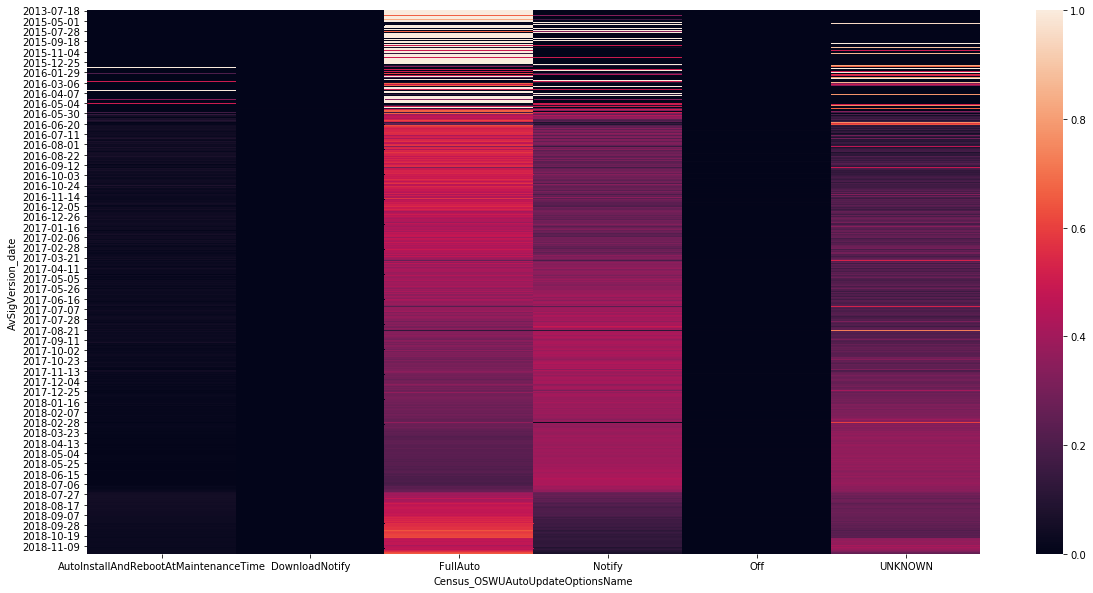

Census_IsPortableOperatingSystem


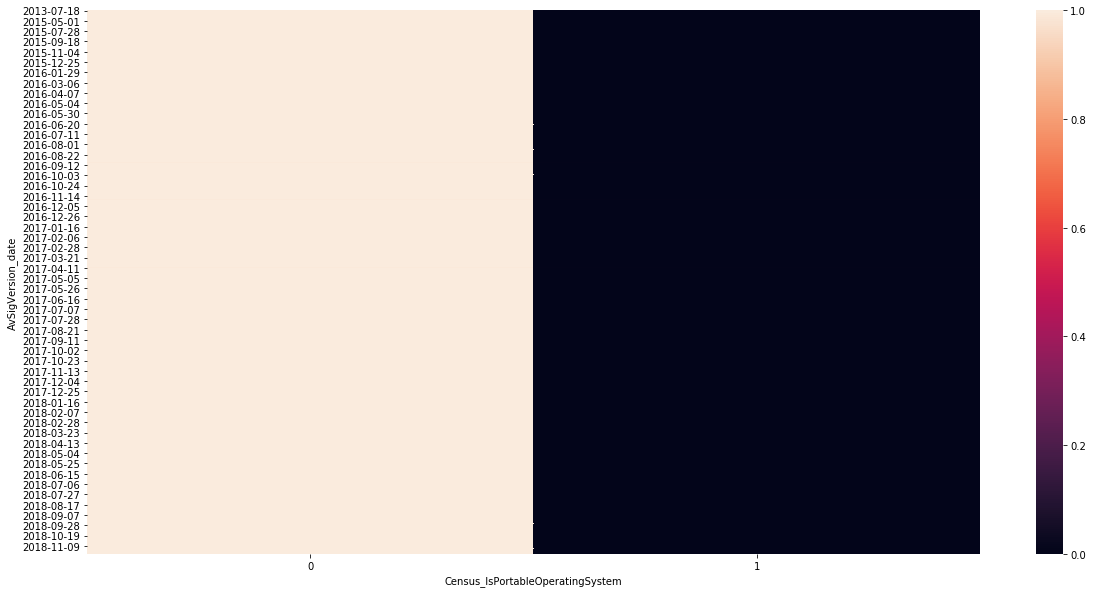

Census_GenuineStateName


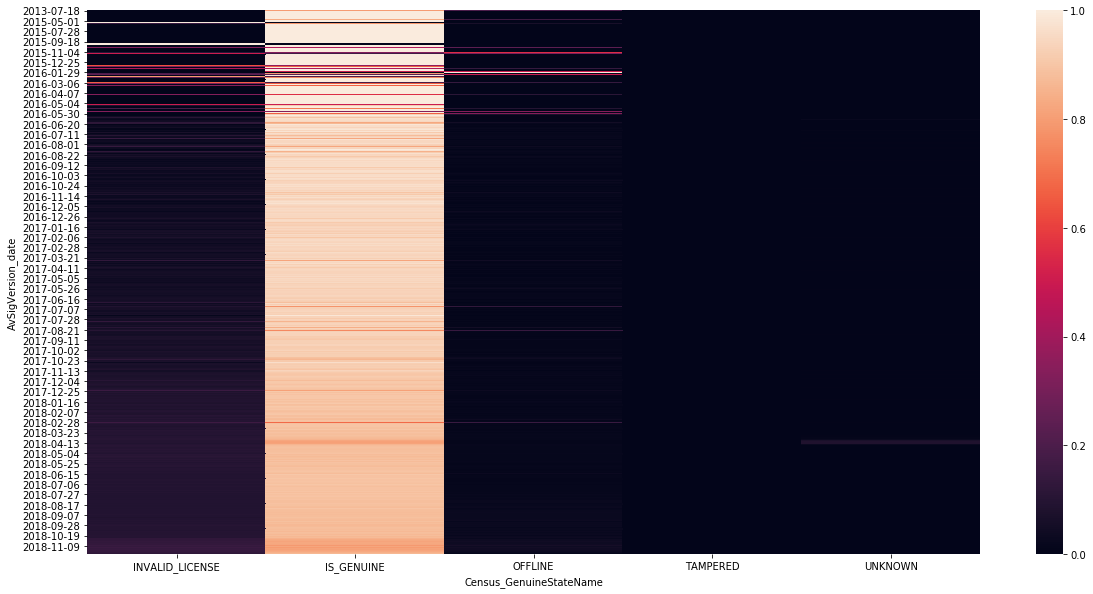

Census_ActivationChannel


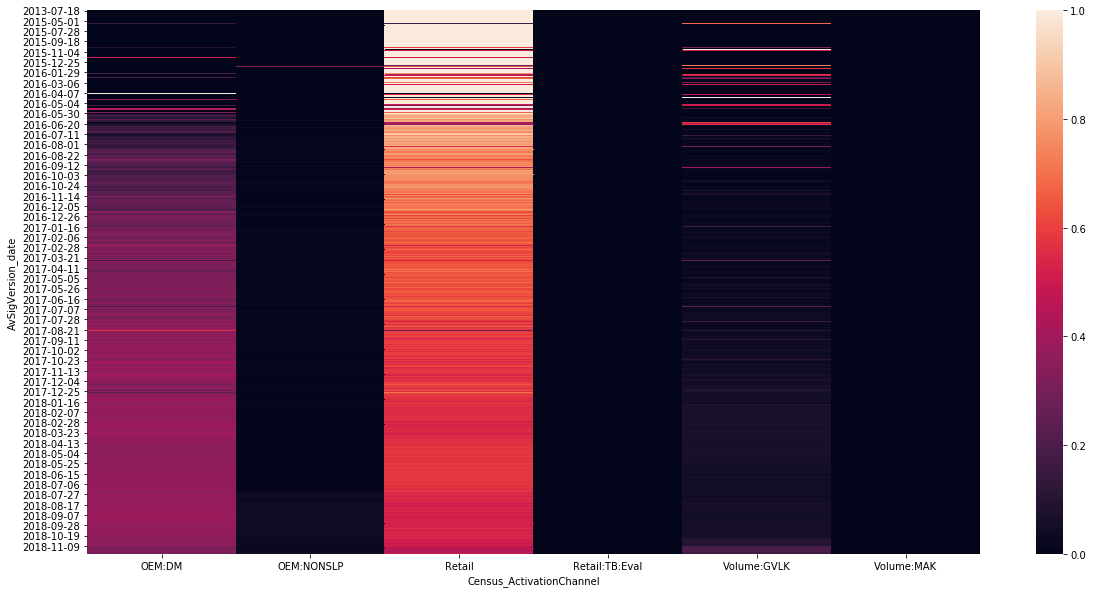

Census_IsFlightingInternal


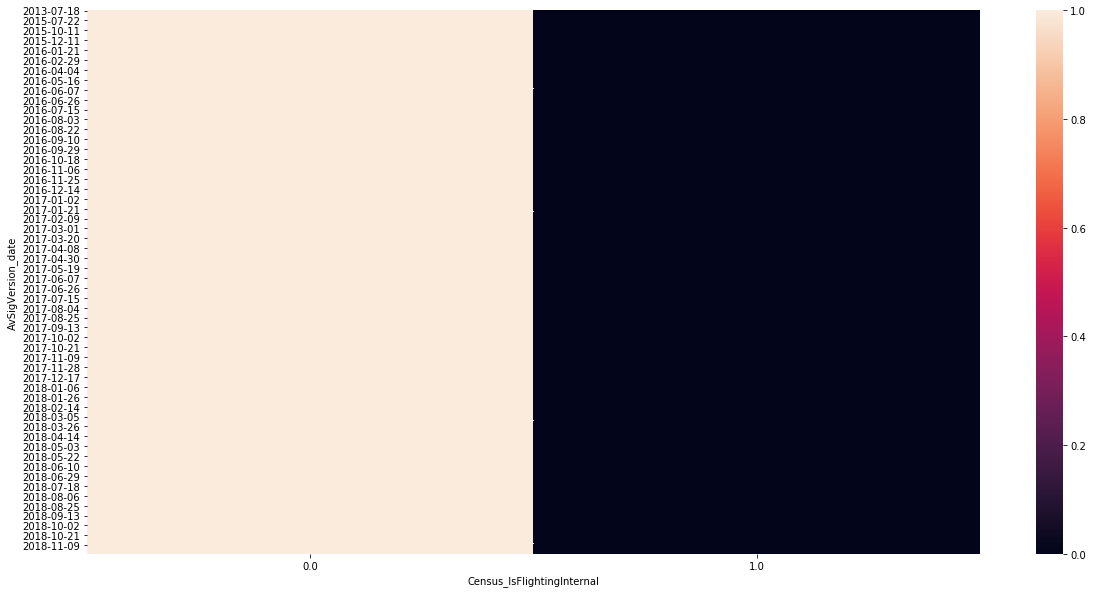

Census_IsFlightsDisabled


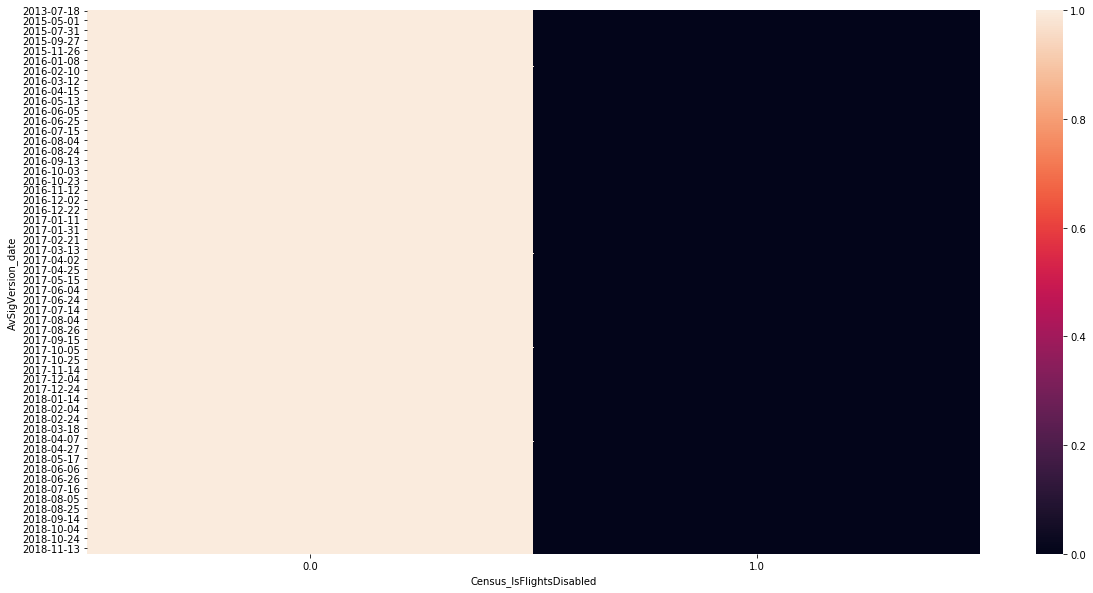

Census_FlightRing


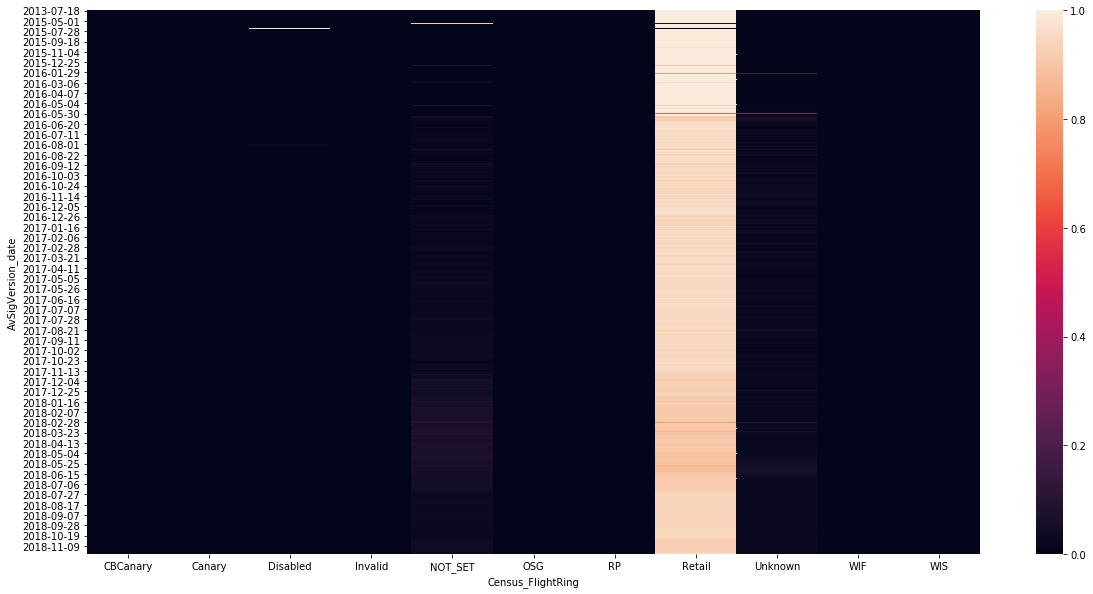

Census_ThresholdOptIn


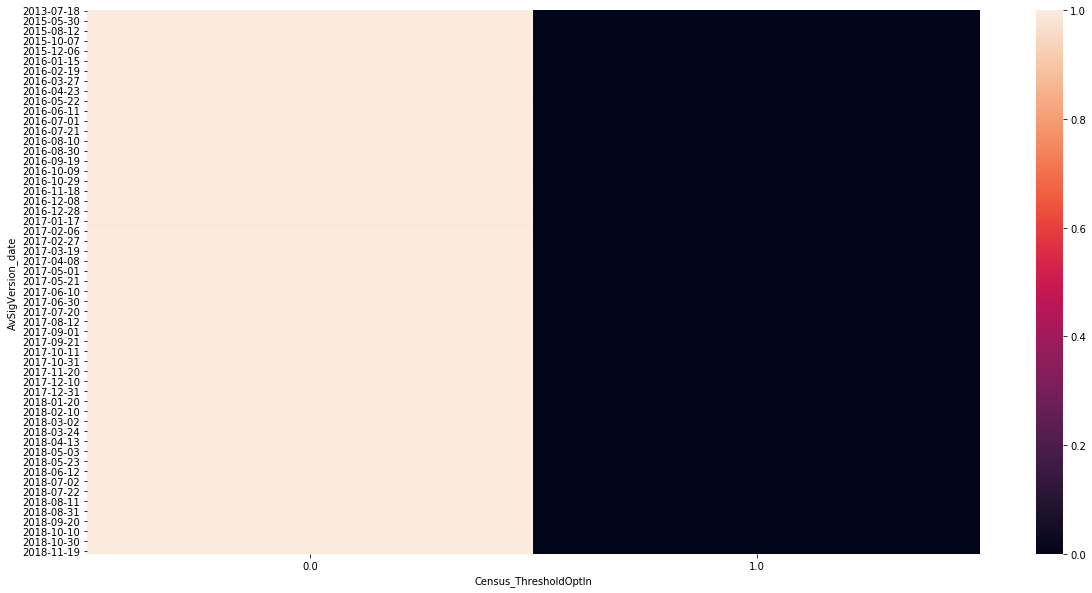

Census_FirmwareManufacturerIdentifier


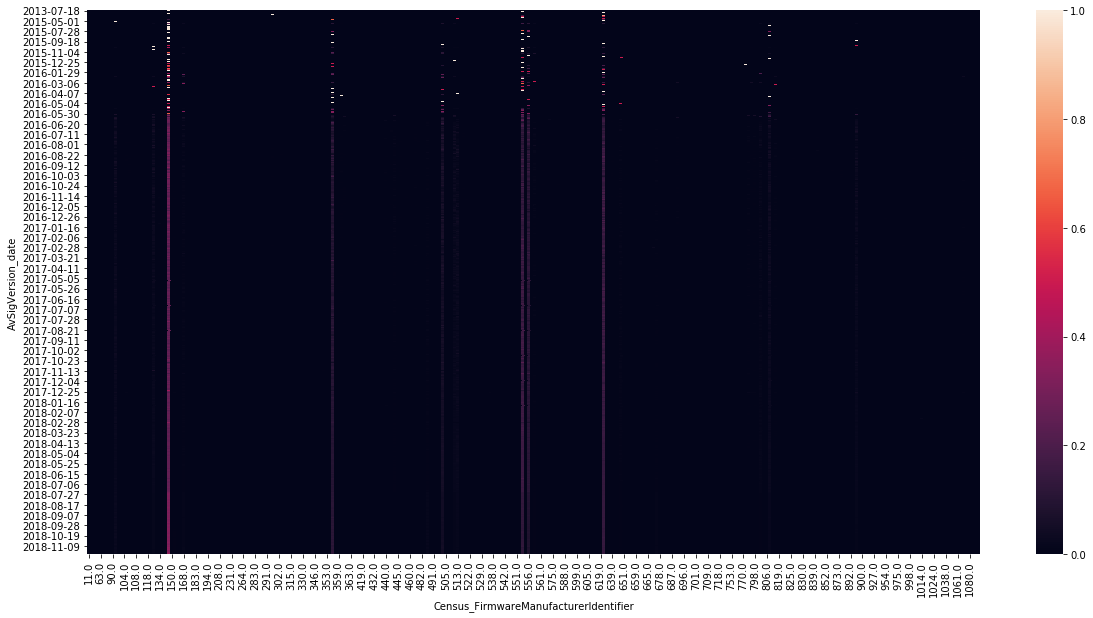

Census_FirmwareVersionIdentifier


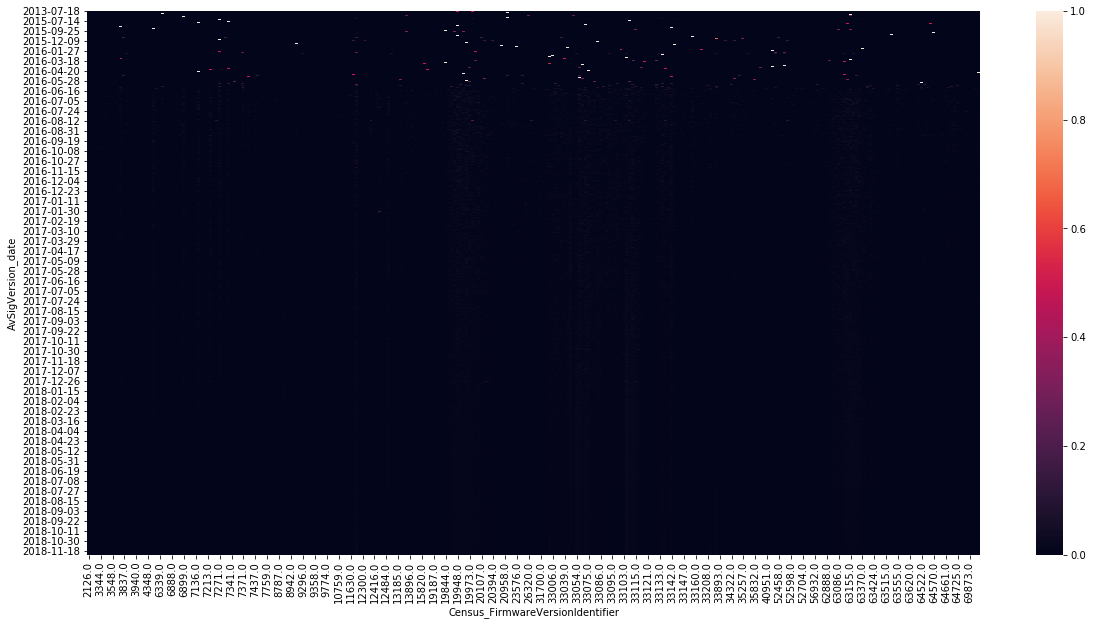

Census_IsSecureBootEnabled


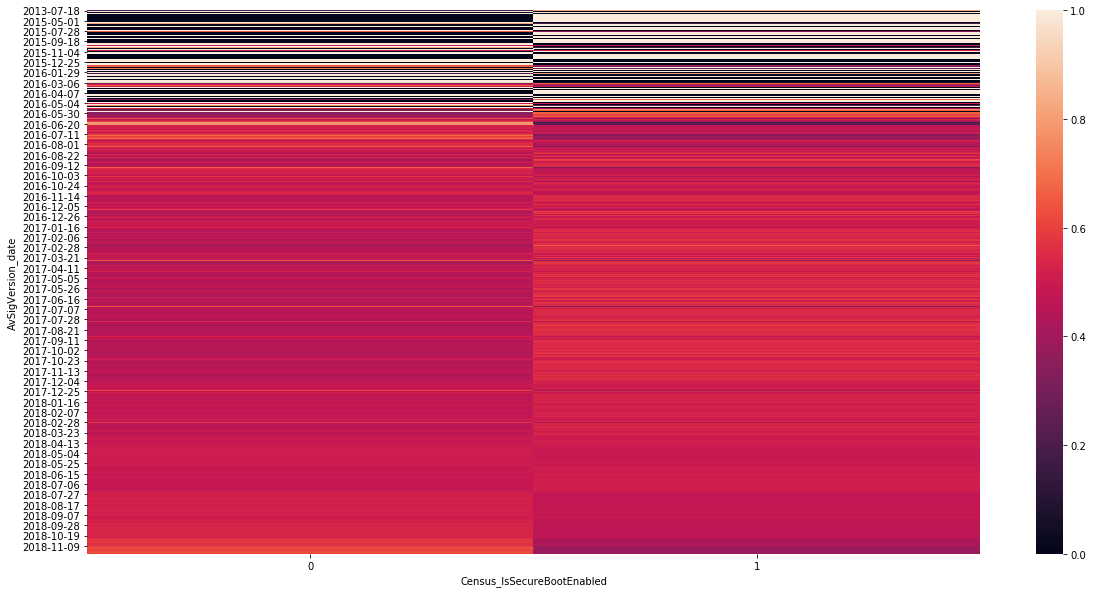

Census_IsWIMBootEnabled


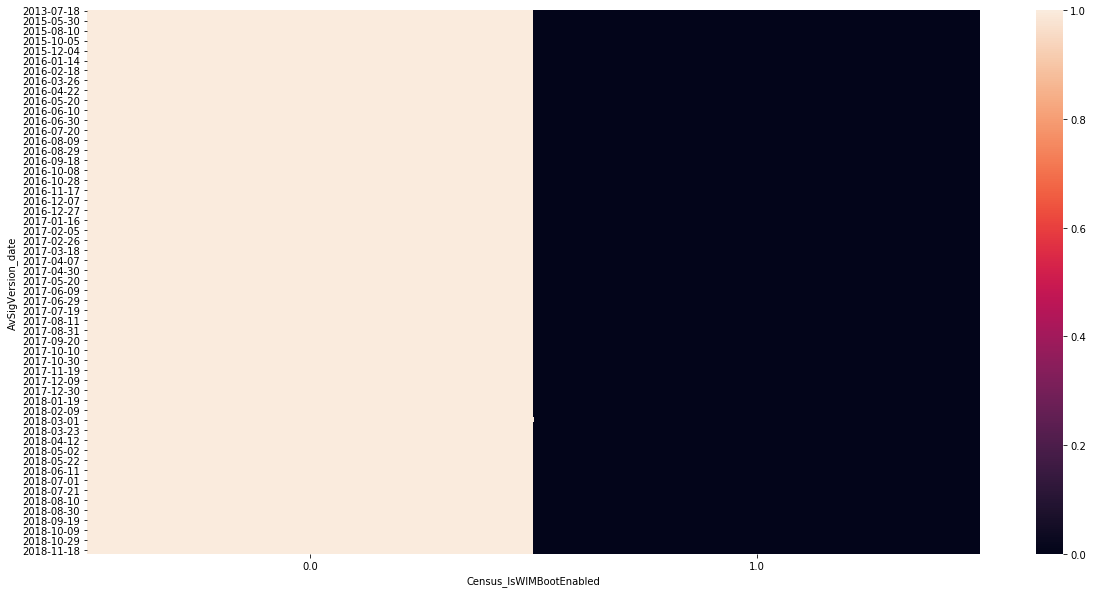

Census_IsVirtualDevice


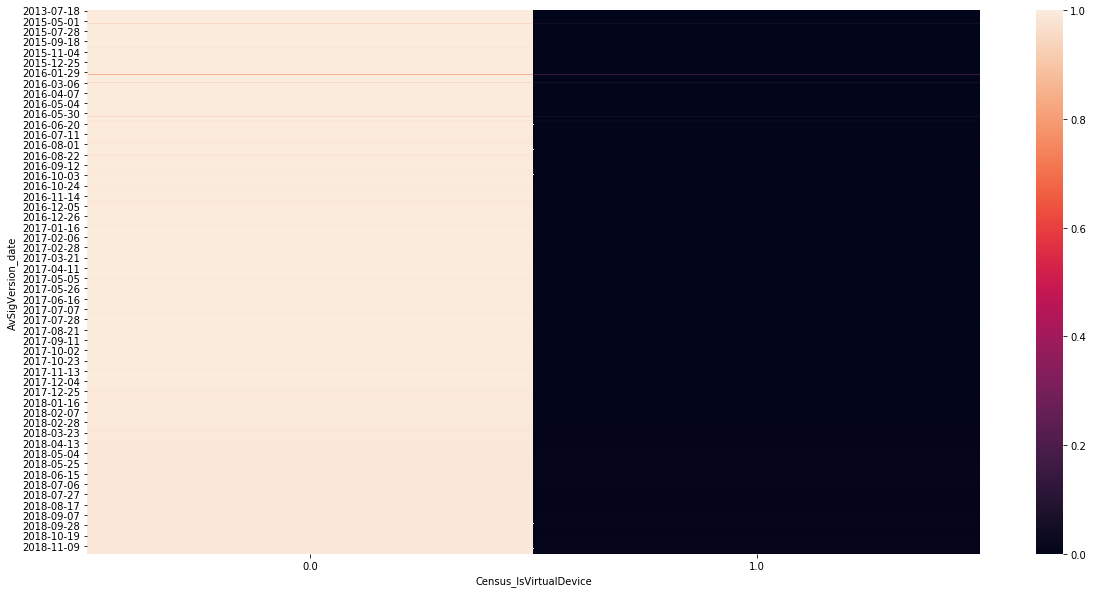

Census_IsTouchEnabled


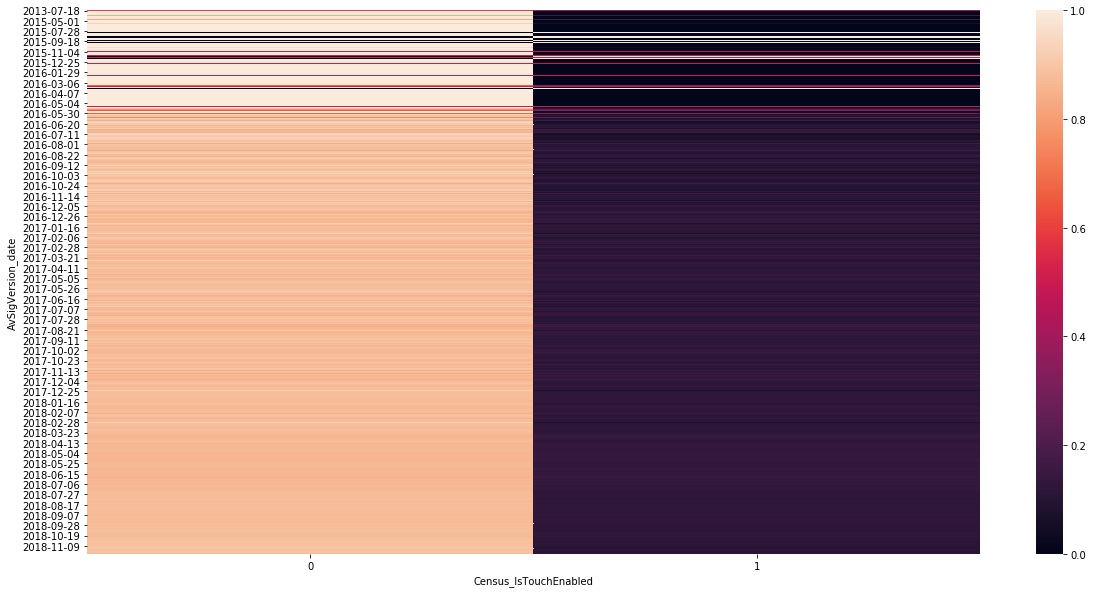

Census_IsPenCapable


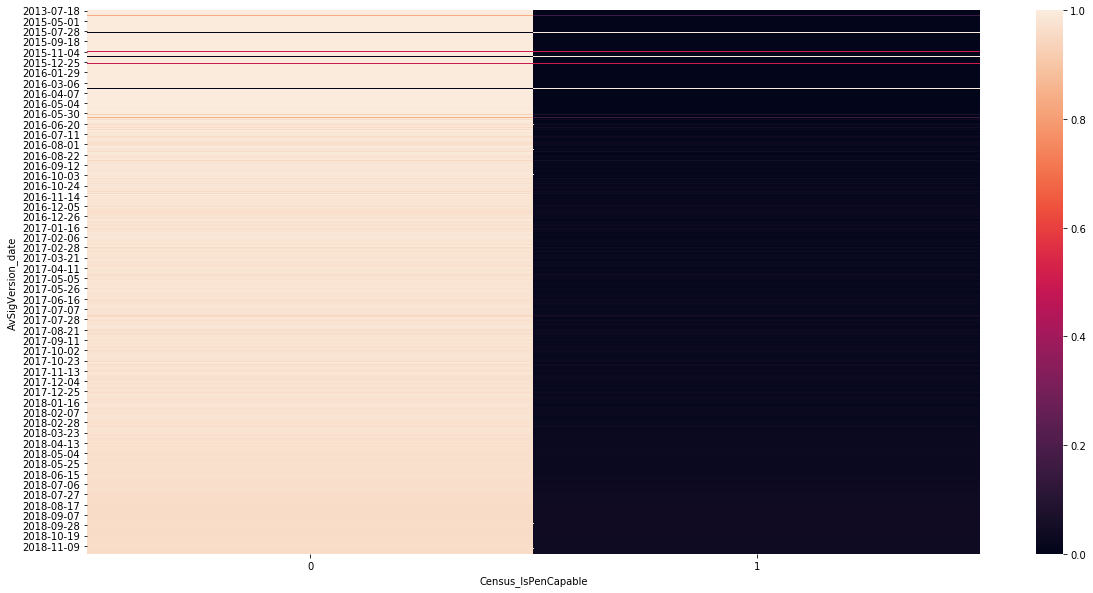

Census_IsAlwaysOnAlwaysConnectedCapable


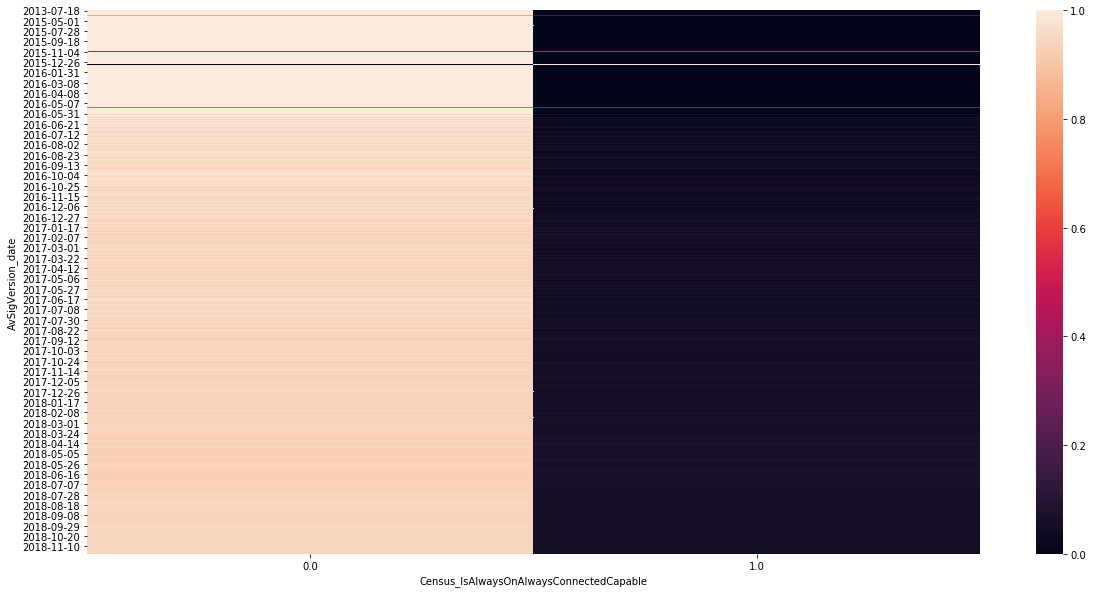

Wdft_IsGamer


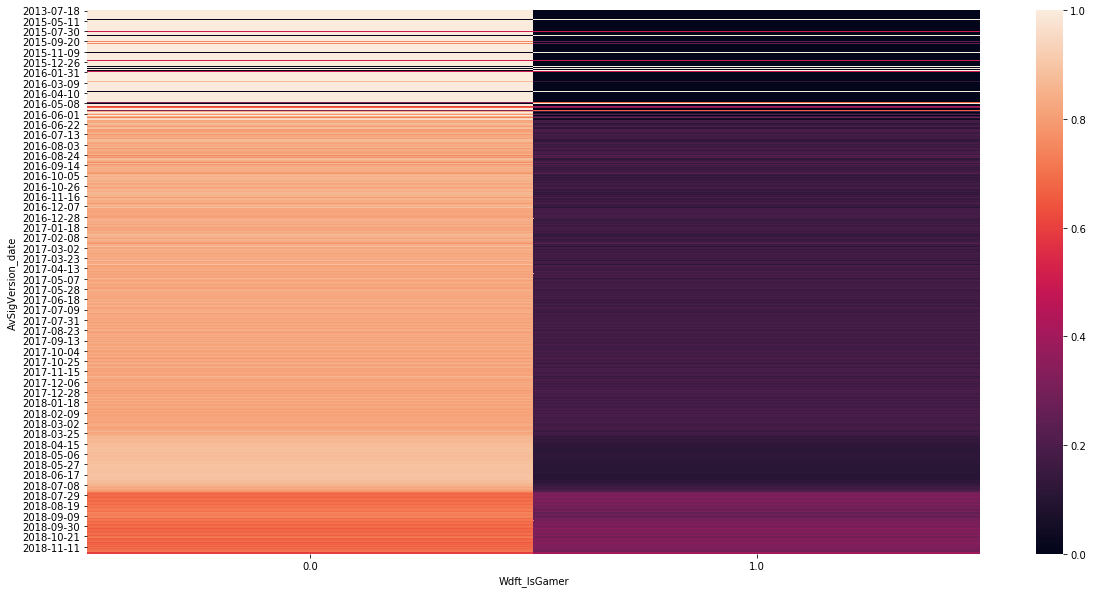

Wdft_RegionIdentifier


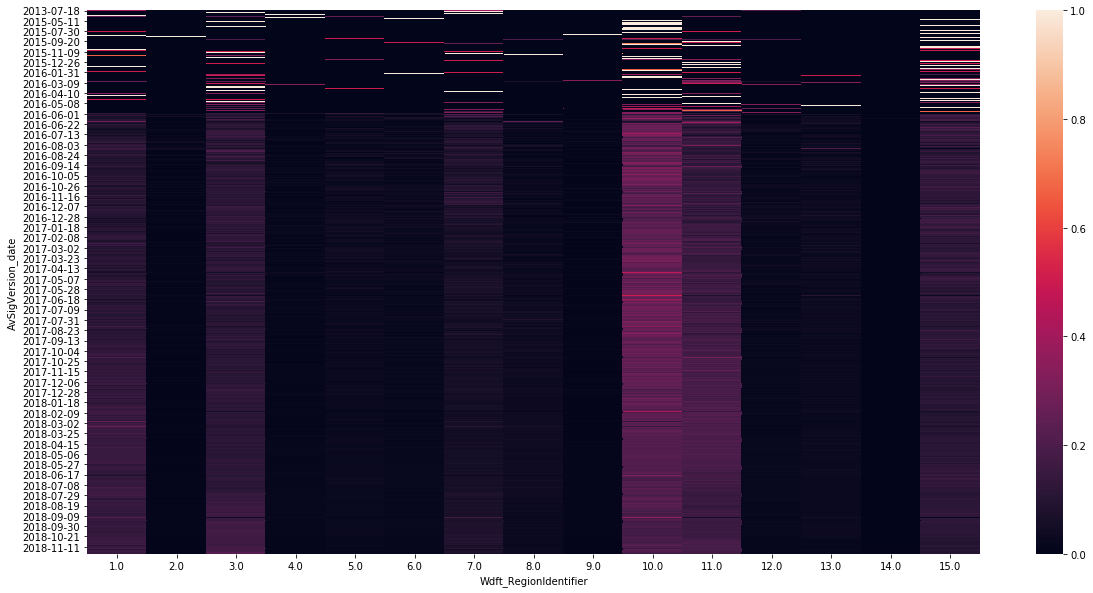

AvSigVersion_datetime


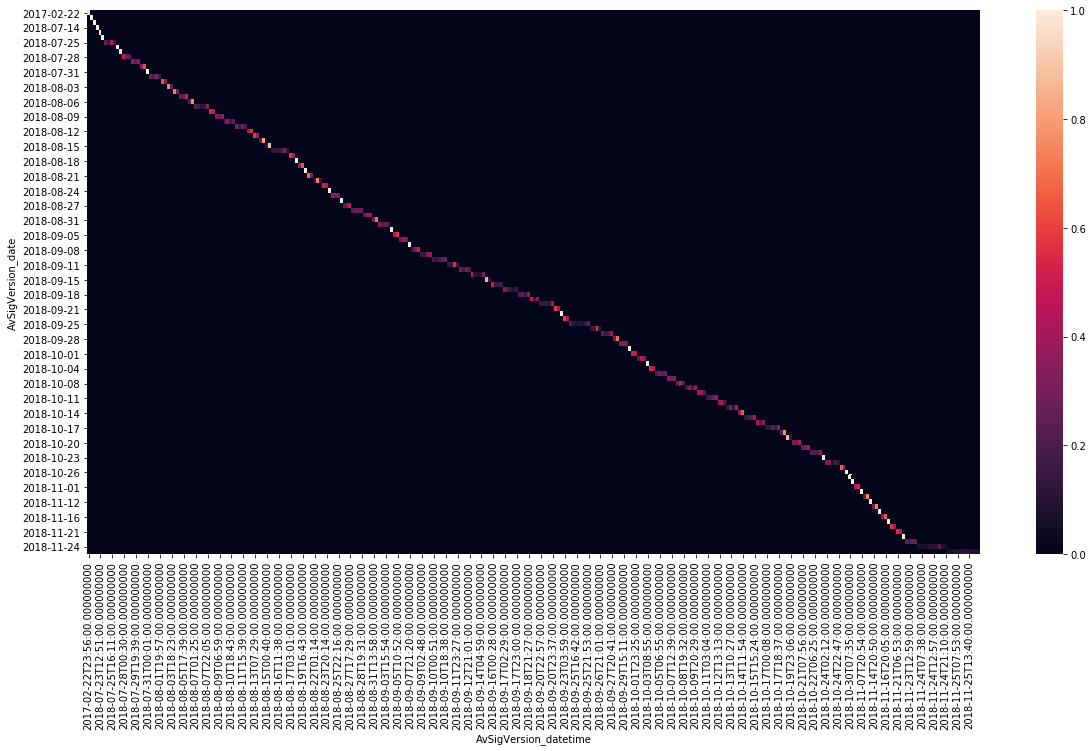

In [7]:
for c in tr.columns:
    if c in ['AvSigVersion', 'AvSigVersion_date', 'AvSigVersion_datetime', 'MachineIdentifier', 'HasDetections']:
        continue
    print(c)
    
    vc = trte[c].value_counts()
    values = vc.head(300).index
    data = trte[trte[c].isin(values)]
    hm = pd.crosstab(data['AvSigVersion_date'], data[c], normalize='index')
    plt.figure(figsize=(20, 10))
    sns.heatmap(hm)
    plt.show()